# Import dependencies

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from pandas.io.json import json_normalize
import datetime
import seaborn as sns
import os
import time
import xmltodict
import re
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from fredapi import Fred
from matplotlib import dates
import warnings
warnings.filterwarnings('ignore')

I create for the purposes of modularity, clarity and readability of my code 2 python classes containing all my helper functions to clean, preprocess and plot my data. They are each in their respective python files : **Dataprocessing_helper.py** and **Plotting_helper.py**

# Import the helper classes from the respective helper Python files

In [2]:
#Class that handles all the dataprocessing
from Dataprocessing_helper import Dataprocessing
#Class that handles all the plotting
from Plotting_helper import Plotter

# Data collection, cleaning and importation

## Instatiate Dataprocessing object

In [3]:
preproc = Dataprocessing()

## Query the data from wikipedia 

In [4]:
# Takes around 5 minutes to query all the data
df_es = preproc.wikiParser(number_of_times = 20,offset=0,language = "es",page = "Venezuela",nr_of_pages=1000 )
df_en = preproc.wikiParser(number_of_times = 20,offset=0,language = "en",page = "Venezuela",nr_of_pages=1000 )

Querying page of language : es
iteration n°1 , done with 1000 rows. Last timestamp : 2006-03-12 19:41:50.
iteration n°2 , done with 1000 rows. Last timestamp : 2007-01-10 01:17:04.
iteration n°3 , done with 1000 rows. Last timestamp : 2007-04-17 00:33:06.
iteration n°4 , done with 1000 rows. Last timestamp : 2007-07-26 19:11:02.
iteration n°5 , done with 1000 rows. Last timestamp : 2007-11-11 23:22:04.
iteration n°6 , done with 1000 rows. Last timestamp : 2008-05-12 20:29:39.
iteration n°7 , done with 1000 rows. Last timestamp : 2008-12-20 03:09:46.
iteration n°8 , done with 1000 rows. Last timestamp : 2009-09-10 01:56:29.
iteration n°9 , done with 1000 rows. Last timestamp : 2010-03-18 17:01:03.
iteration n°10 , done with 1000 rows. Last timestamp : 2012-01-21 20:58:33.
iteration n°11 , done with 1000 rows. Last timestamp : 2013-07-14 15:18:41.
iteration n°12 , done with 1000 rows. Last timestamp : 2015-05-01 03:06:17.
iteration n°13 , done with 1000 rows. Last timestamp : 2017-07-29 

## Preprocessing

In [5]:
# Takes around 10 minutes to clean and feature engineer both dataframes
df_es= preproc.featureEngineer(df_es,save = False,repeat = False,from_parser=True,language = "es")
df_en= preproc.featureEngineer(df_en,save = False,repeat = False,from_parser=True,language = "en")

replaced
renamed
dropped
cleaned
features engineered
54 revisions of this page have been victim of vandalisation attempts ( their number of links has brutally fallen )
done with all es 


replaced
renamed
dropped
cleaned
features engineered
122 revisions of this page have been victim of vandalisation attempts ( their number of links has brutally fallen )
done with all en 




## Groupby

In [6]:
g_es = preproc.groupVariables(df_es,save = True, language = "es")
g_en = preproc.groupVariables(df_en,save = True, language = "en")

## Getting external data

In [7]:
#FRED
df_oil = preproc.getExteriorData(url = None, variable = "Petrol_Price",method = "f")
#IMF
df_inf = preproc.getExteriorData("https://www.quandl.com/api/v3/datasets/ODA/VEN_PCPIPCH.csv?start_date=2002-01-01&end_date=2021-10-01-api_key=n8o_axPhpEMEjogsYt1A",
                                variable = "Inflation_Rate", method = "q")

## Create combined dataframes

In [8]:
complete_en = pd.merge(pd.merge(g_en,df_oil,left_on="Year_month",right_on="Year_Month",how = "left"),df_inf,left_on="Year_month",right_on="Year_Month",how = "left")
complete_es = pd.merge(pd.merge(g_es,df_oil,left_on="Year_month",right_on="Year_Month",how = "left"),df_inf,left_on="Year_month",right_on="Year_Month",how = "left")

# Time to plot all those data using the Plotter class

## Instatiate Plotter object

In [9]:
# Define the uniform size and fontsize for all my time series in one simple command
plotter = Plotter(fontsize=55,size = (45,15))

## Heatmaps

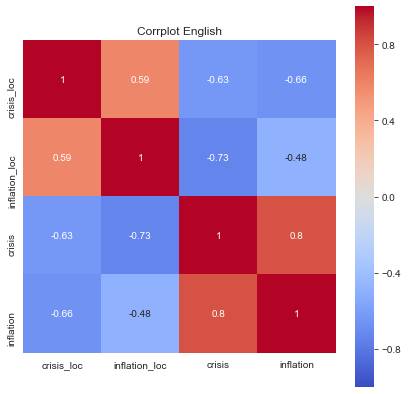

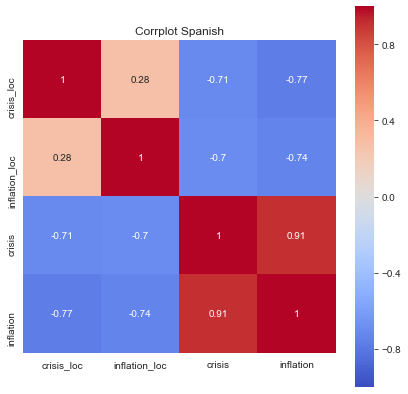

In [10]:
plotter.correlationPlots(complete_en)
plotter.correlationPlots(complete_es,language="Spanish")

## Plotting the time series of word mentions and locations on each language

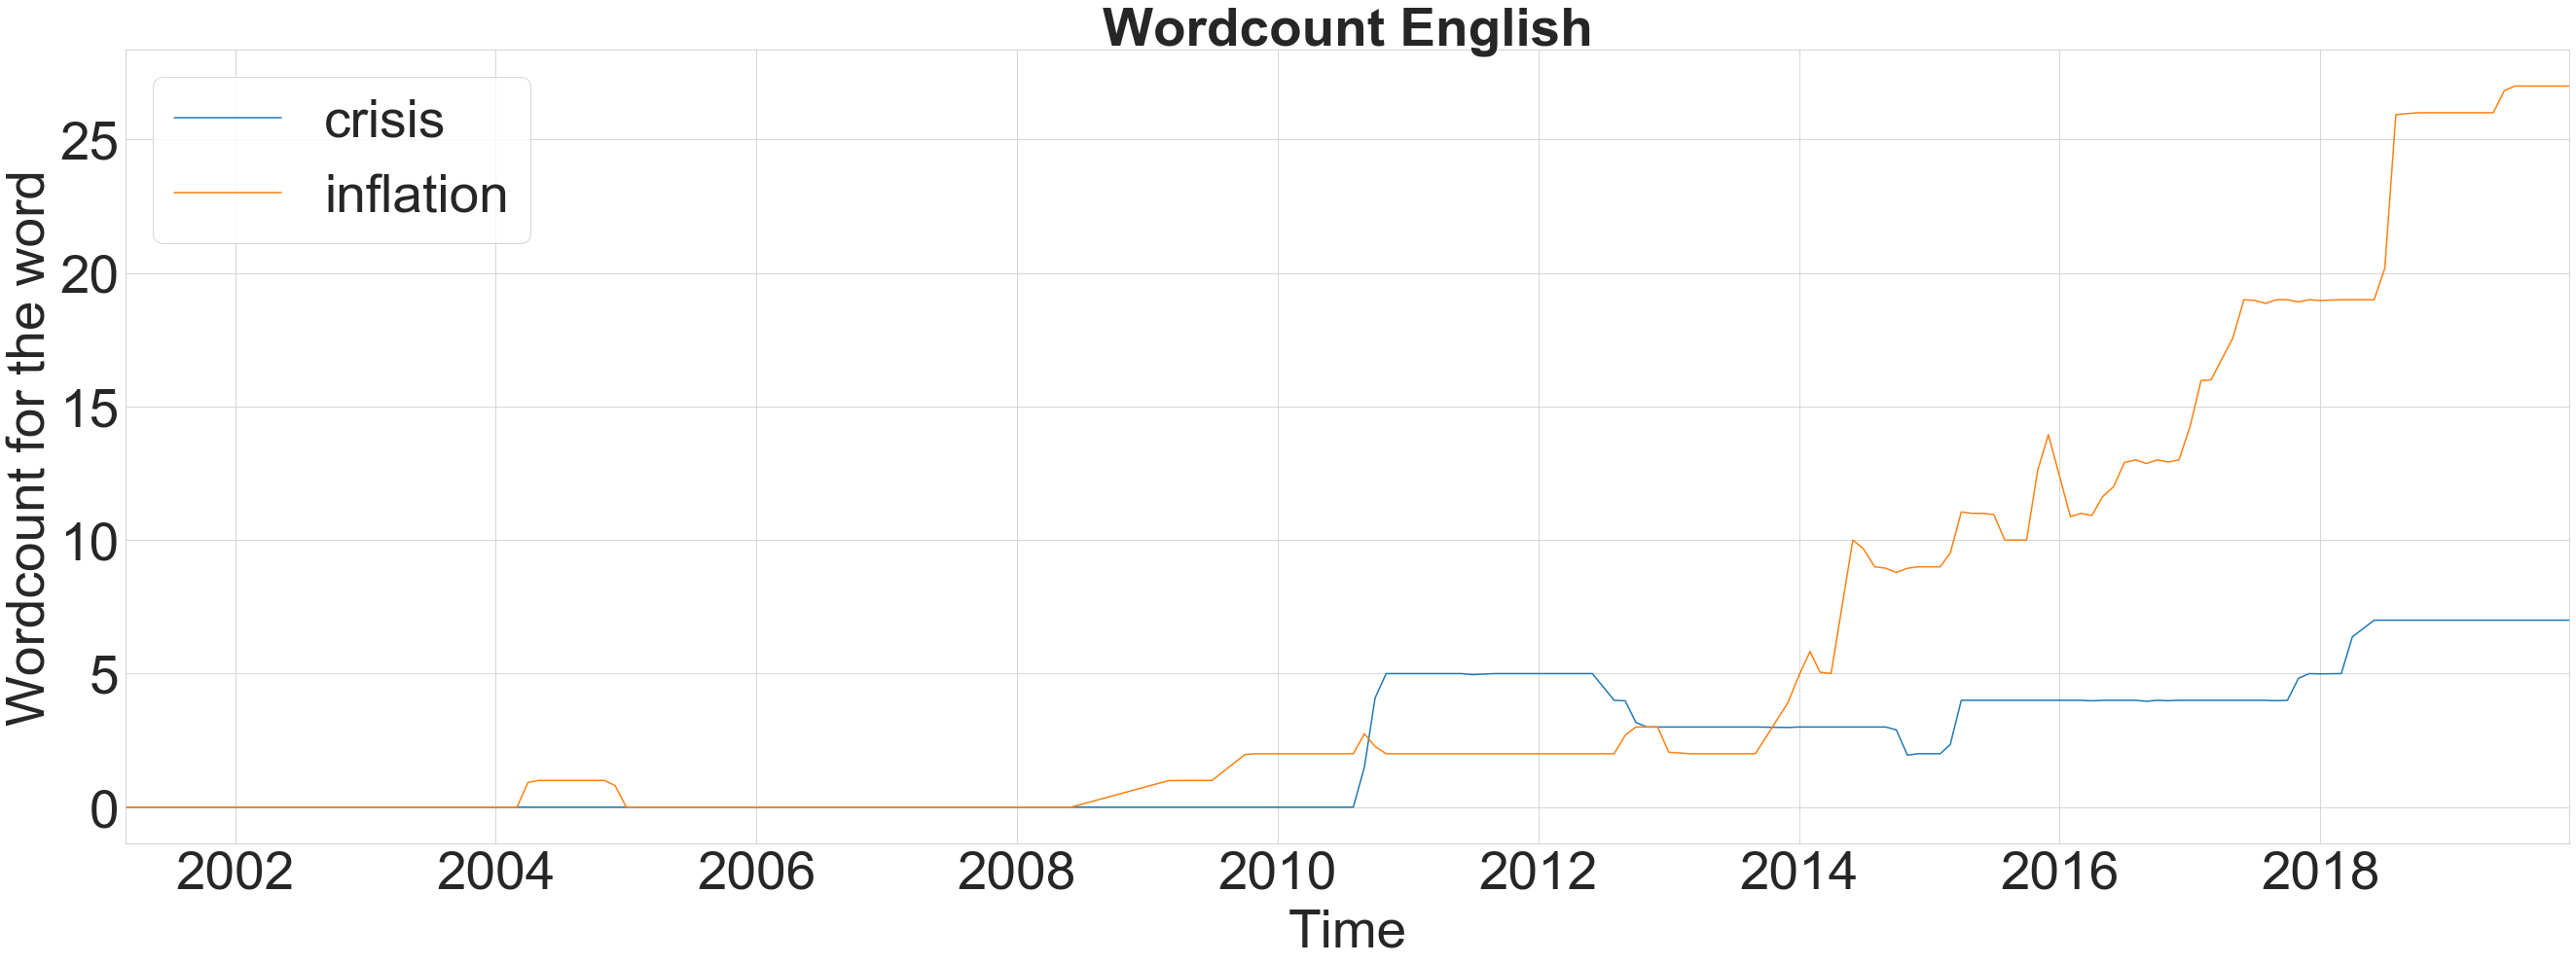

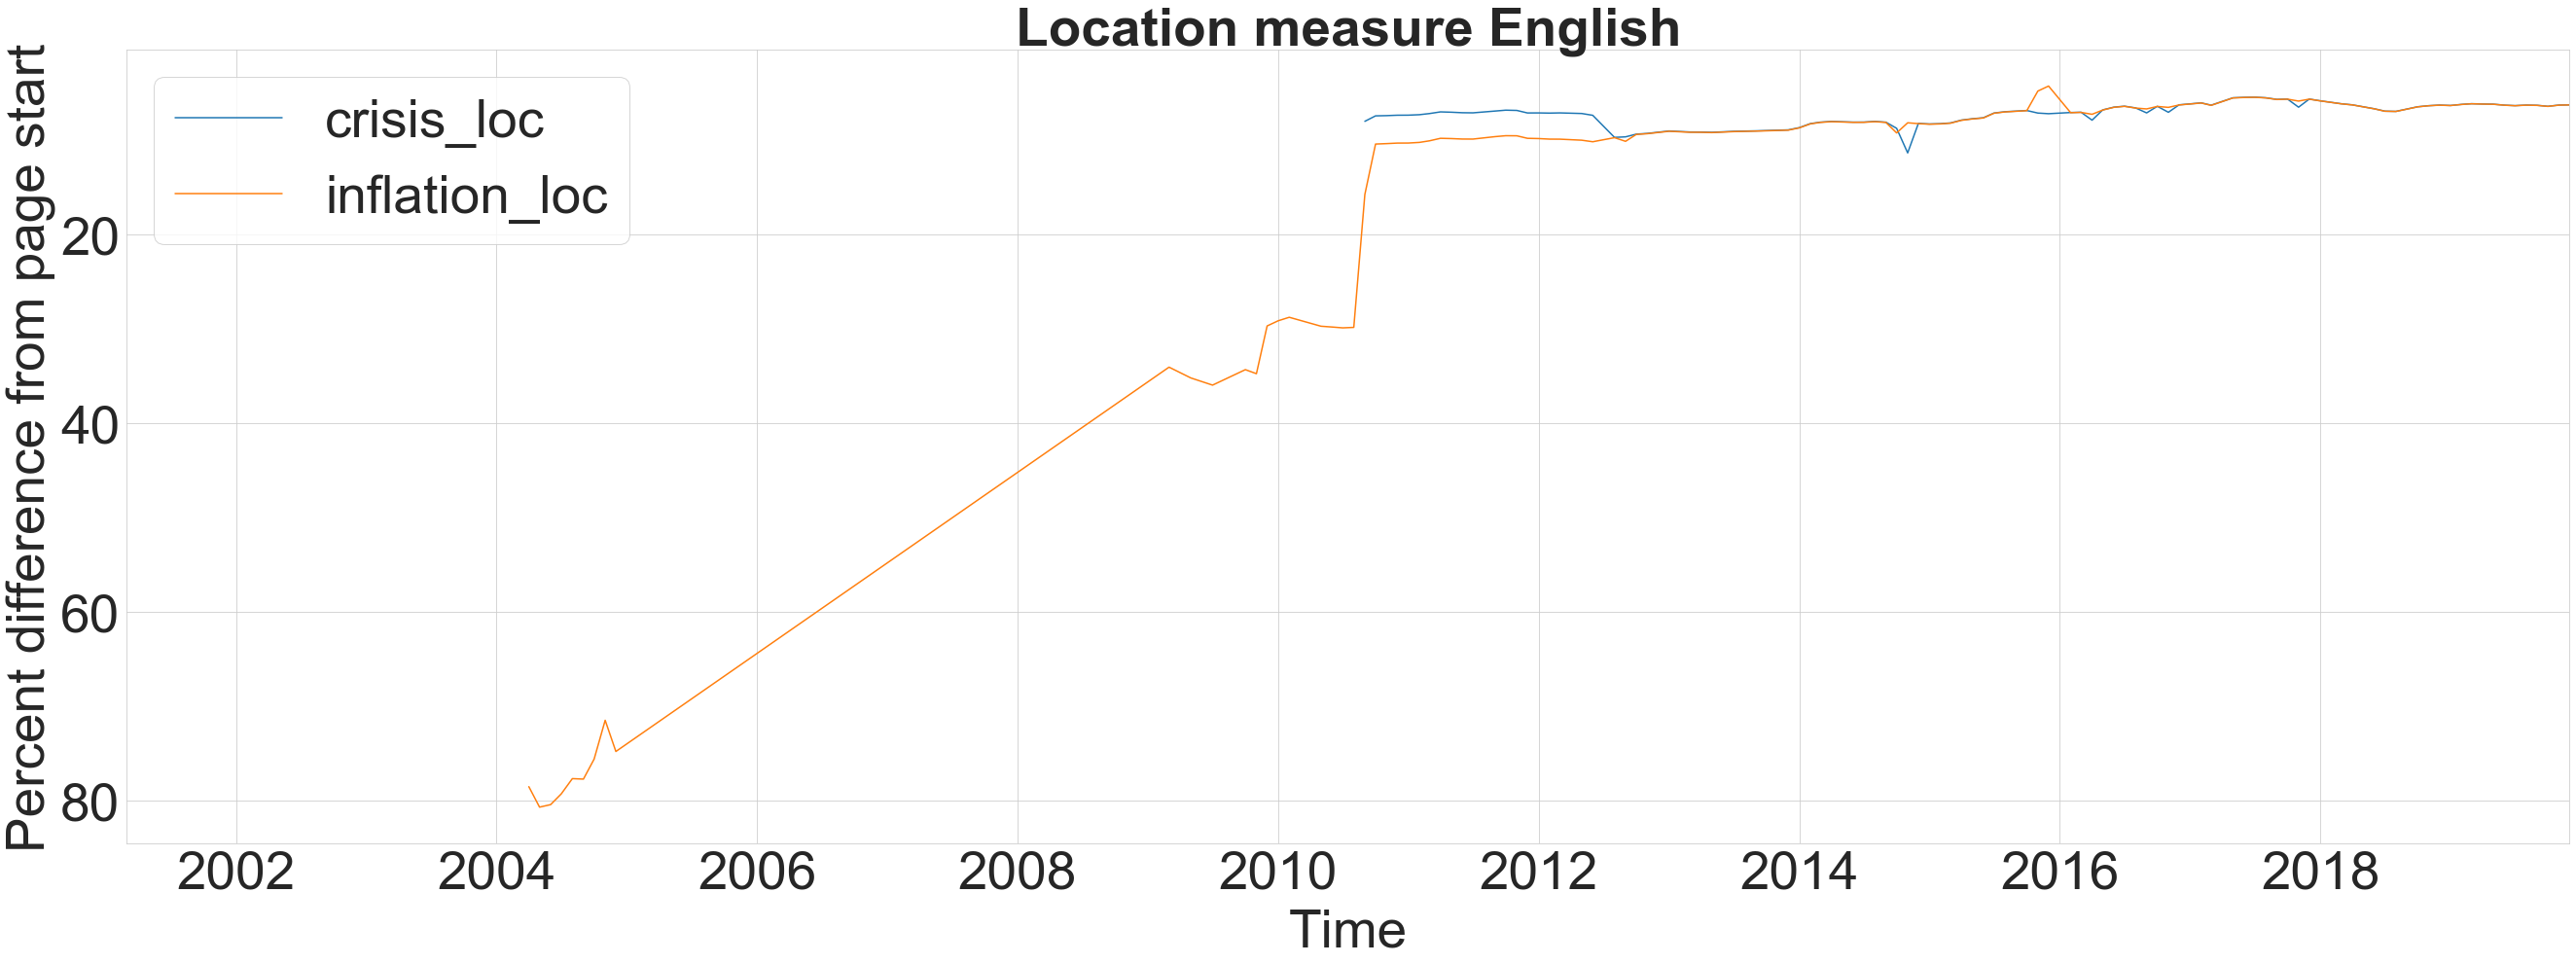

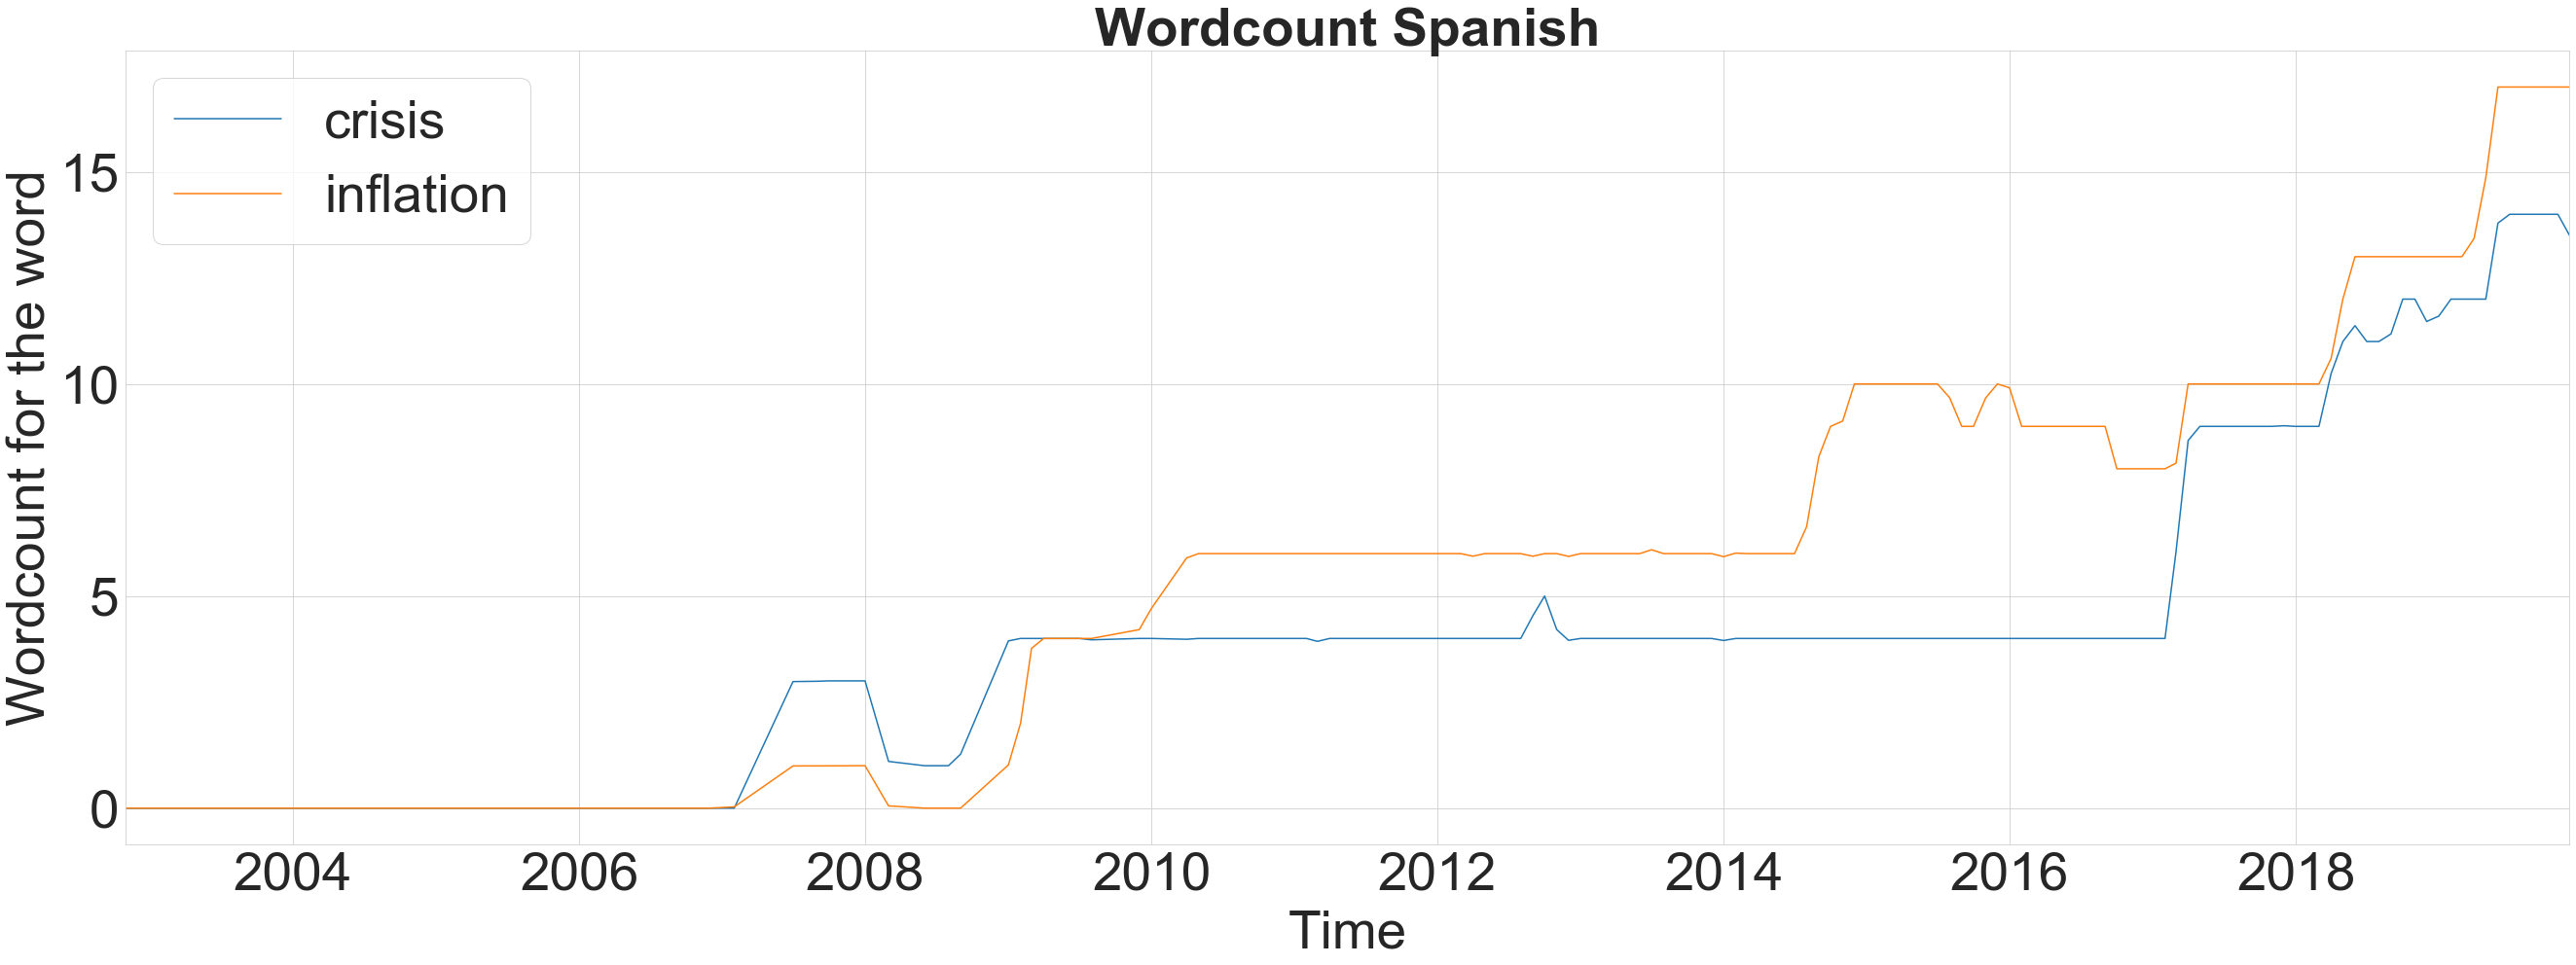

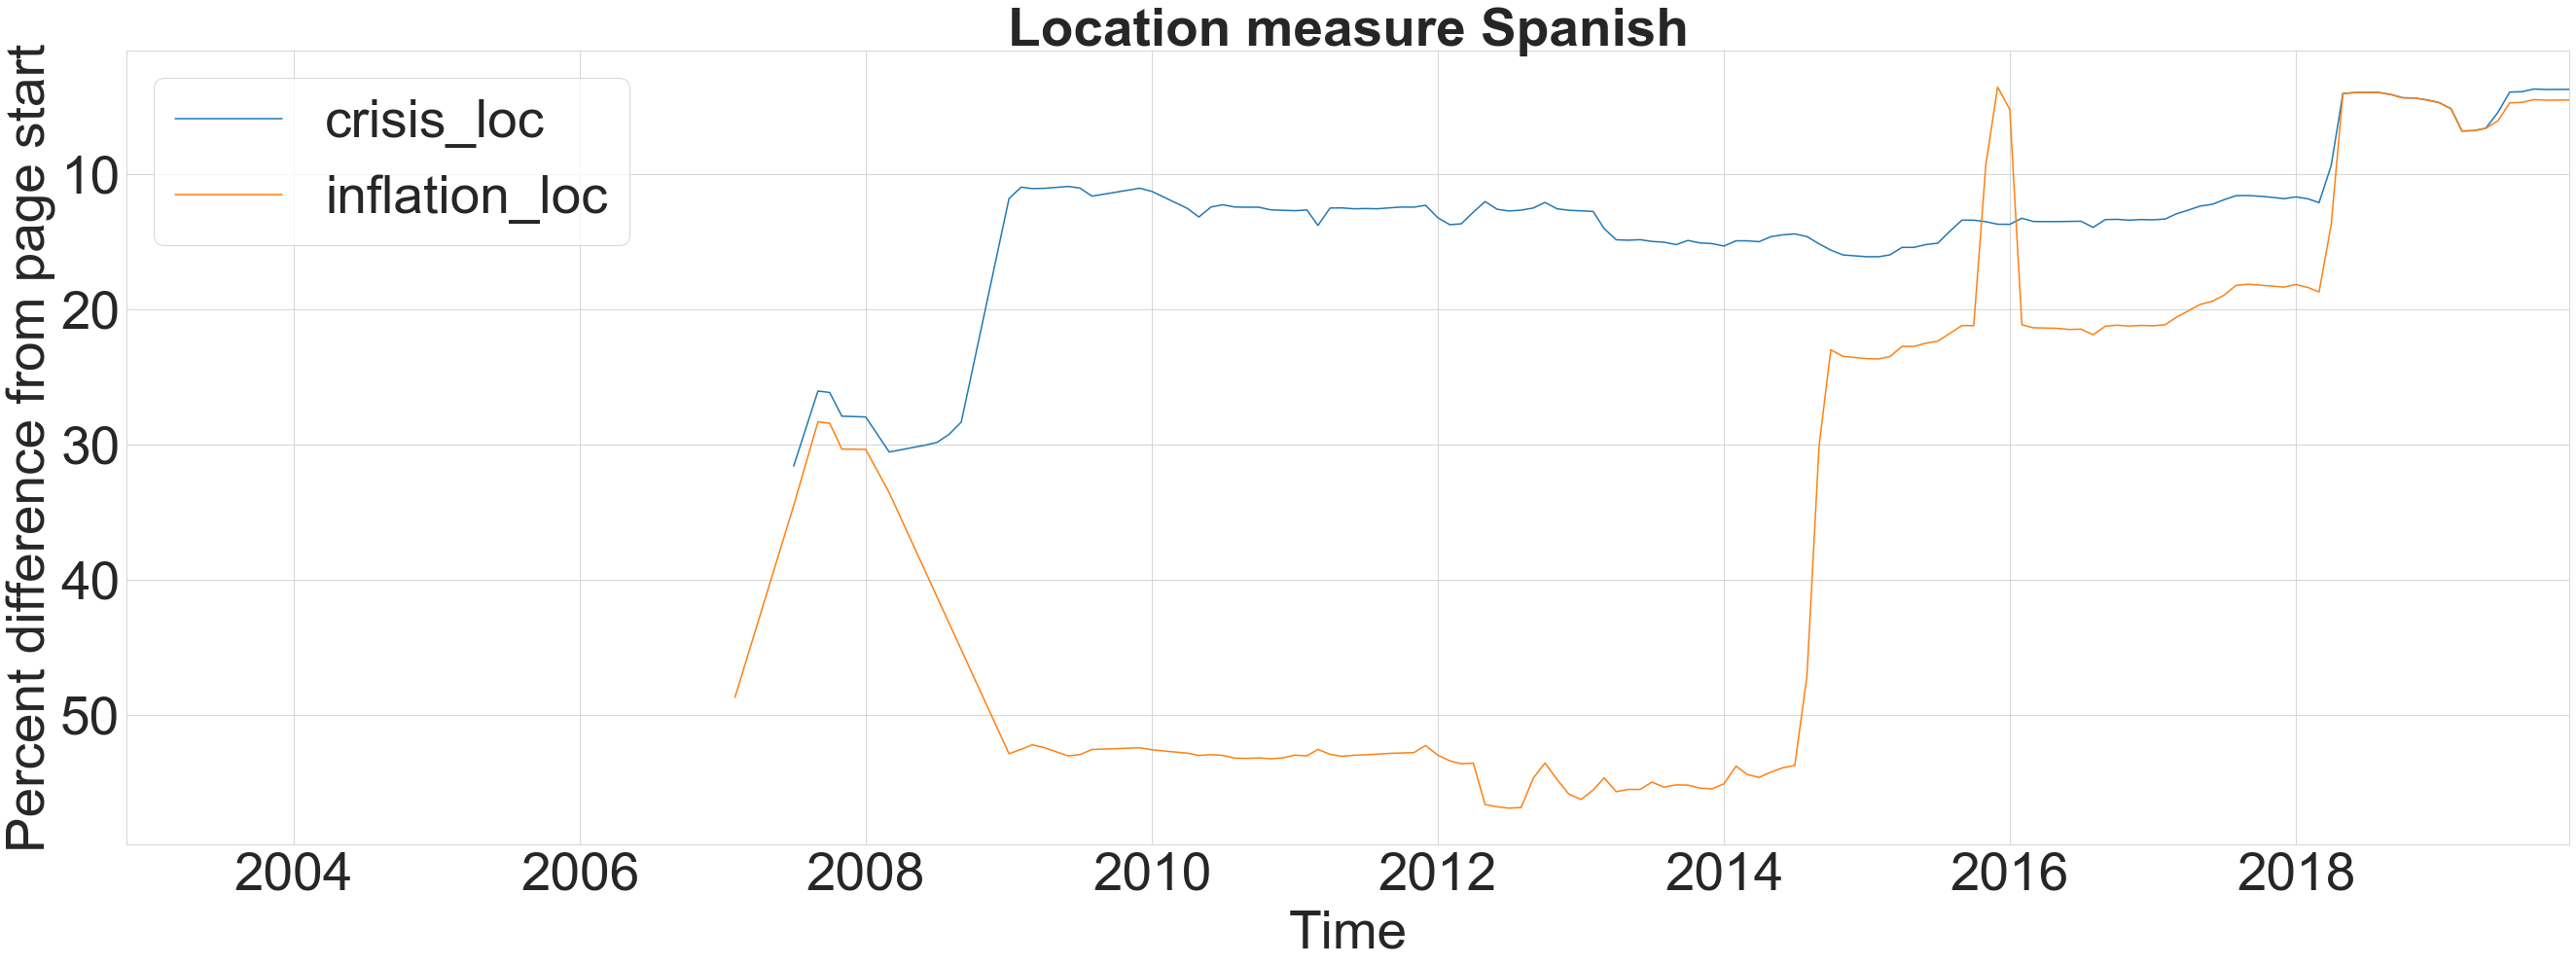

In [11]:
plotter.betweenWordComparison(g_en, time = "Year_month",language = " English")
plotter.betweenWordComparison(g_es, time = "Year_month", language = " Spanish")

## Plotting Time Series with interactions

### Inflation and inflation rate

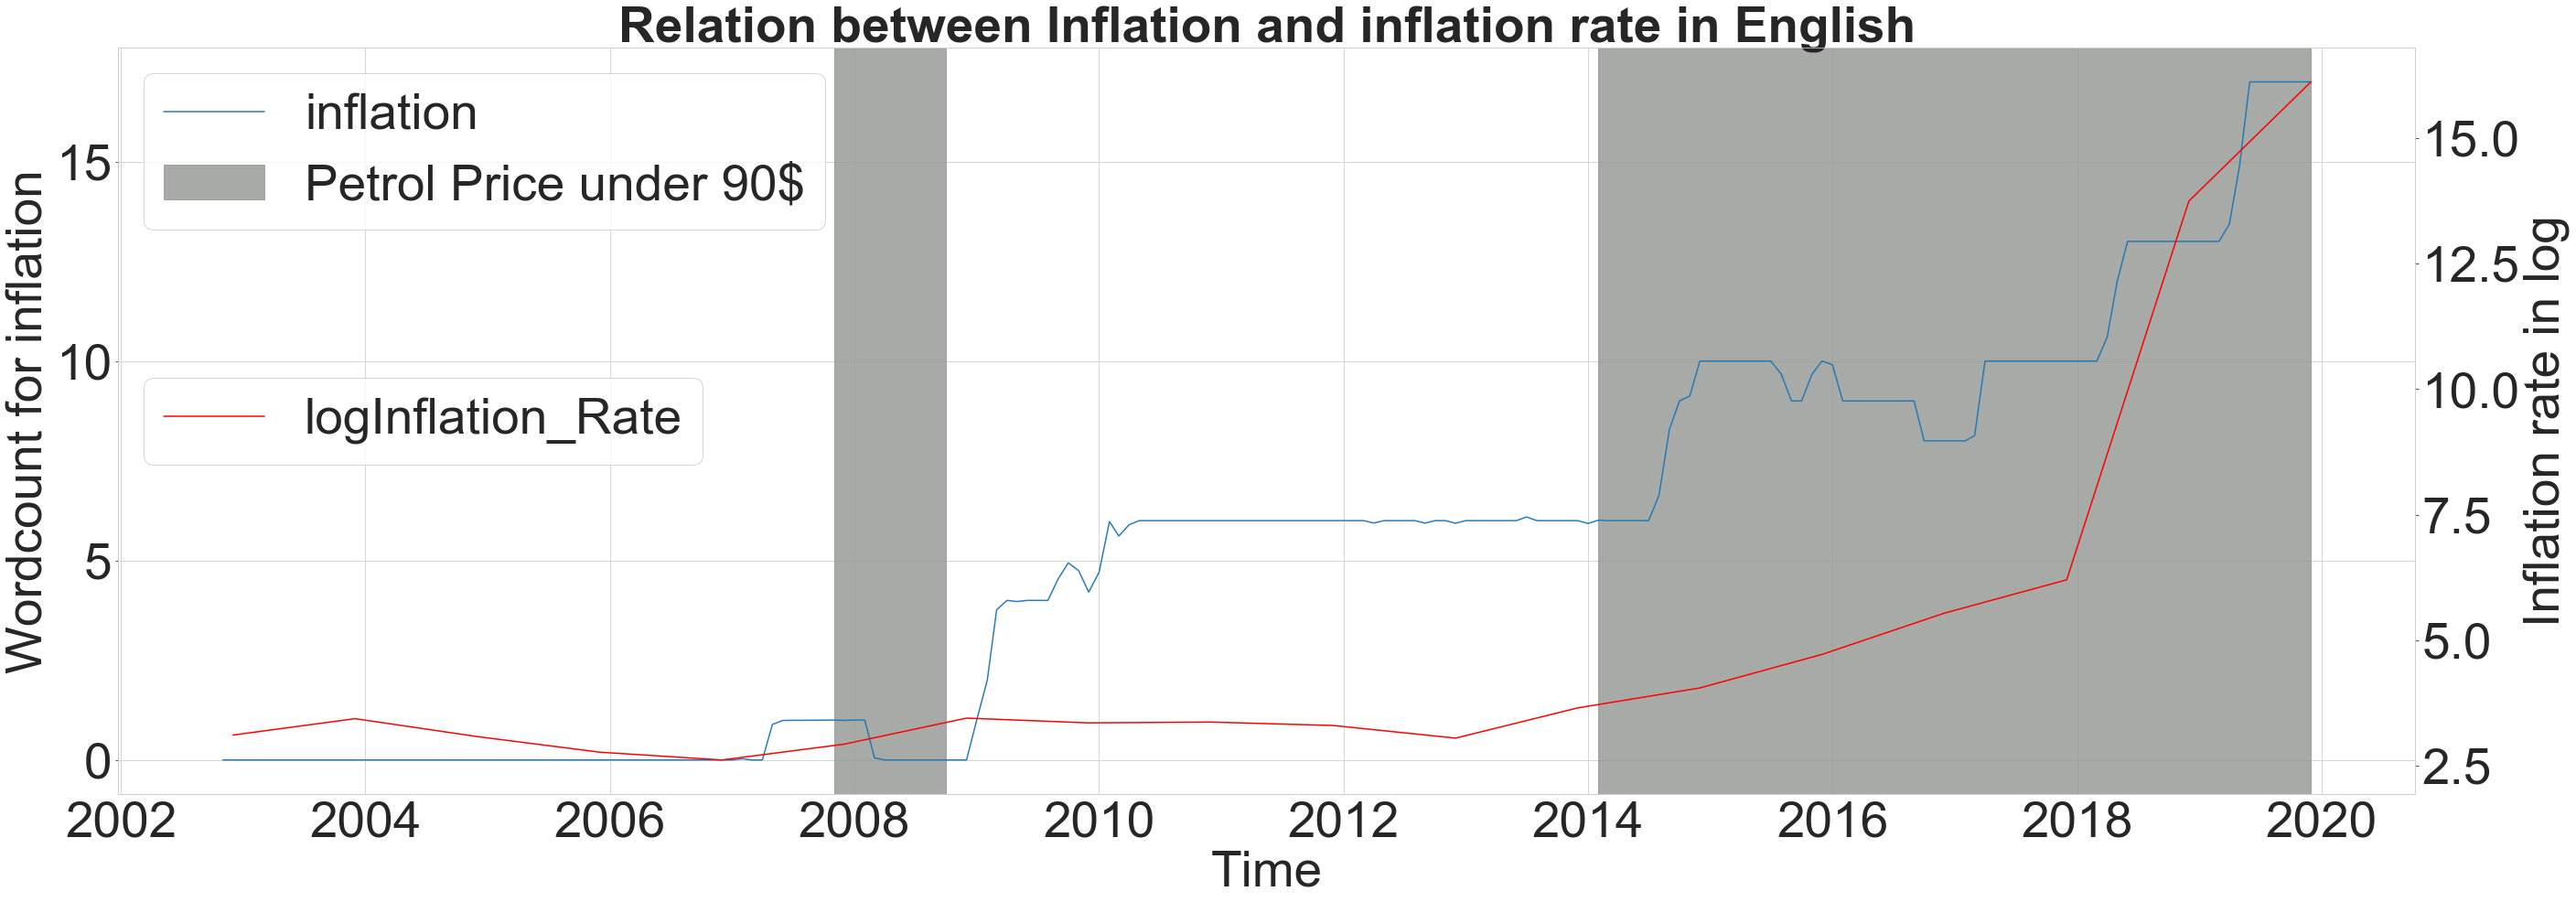

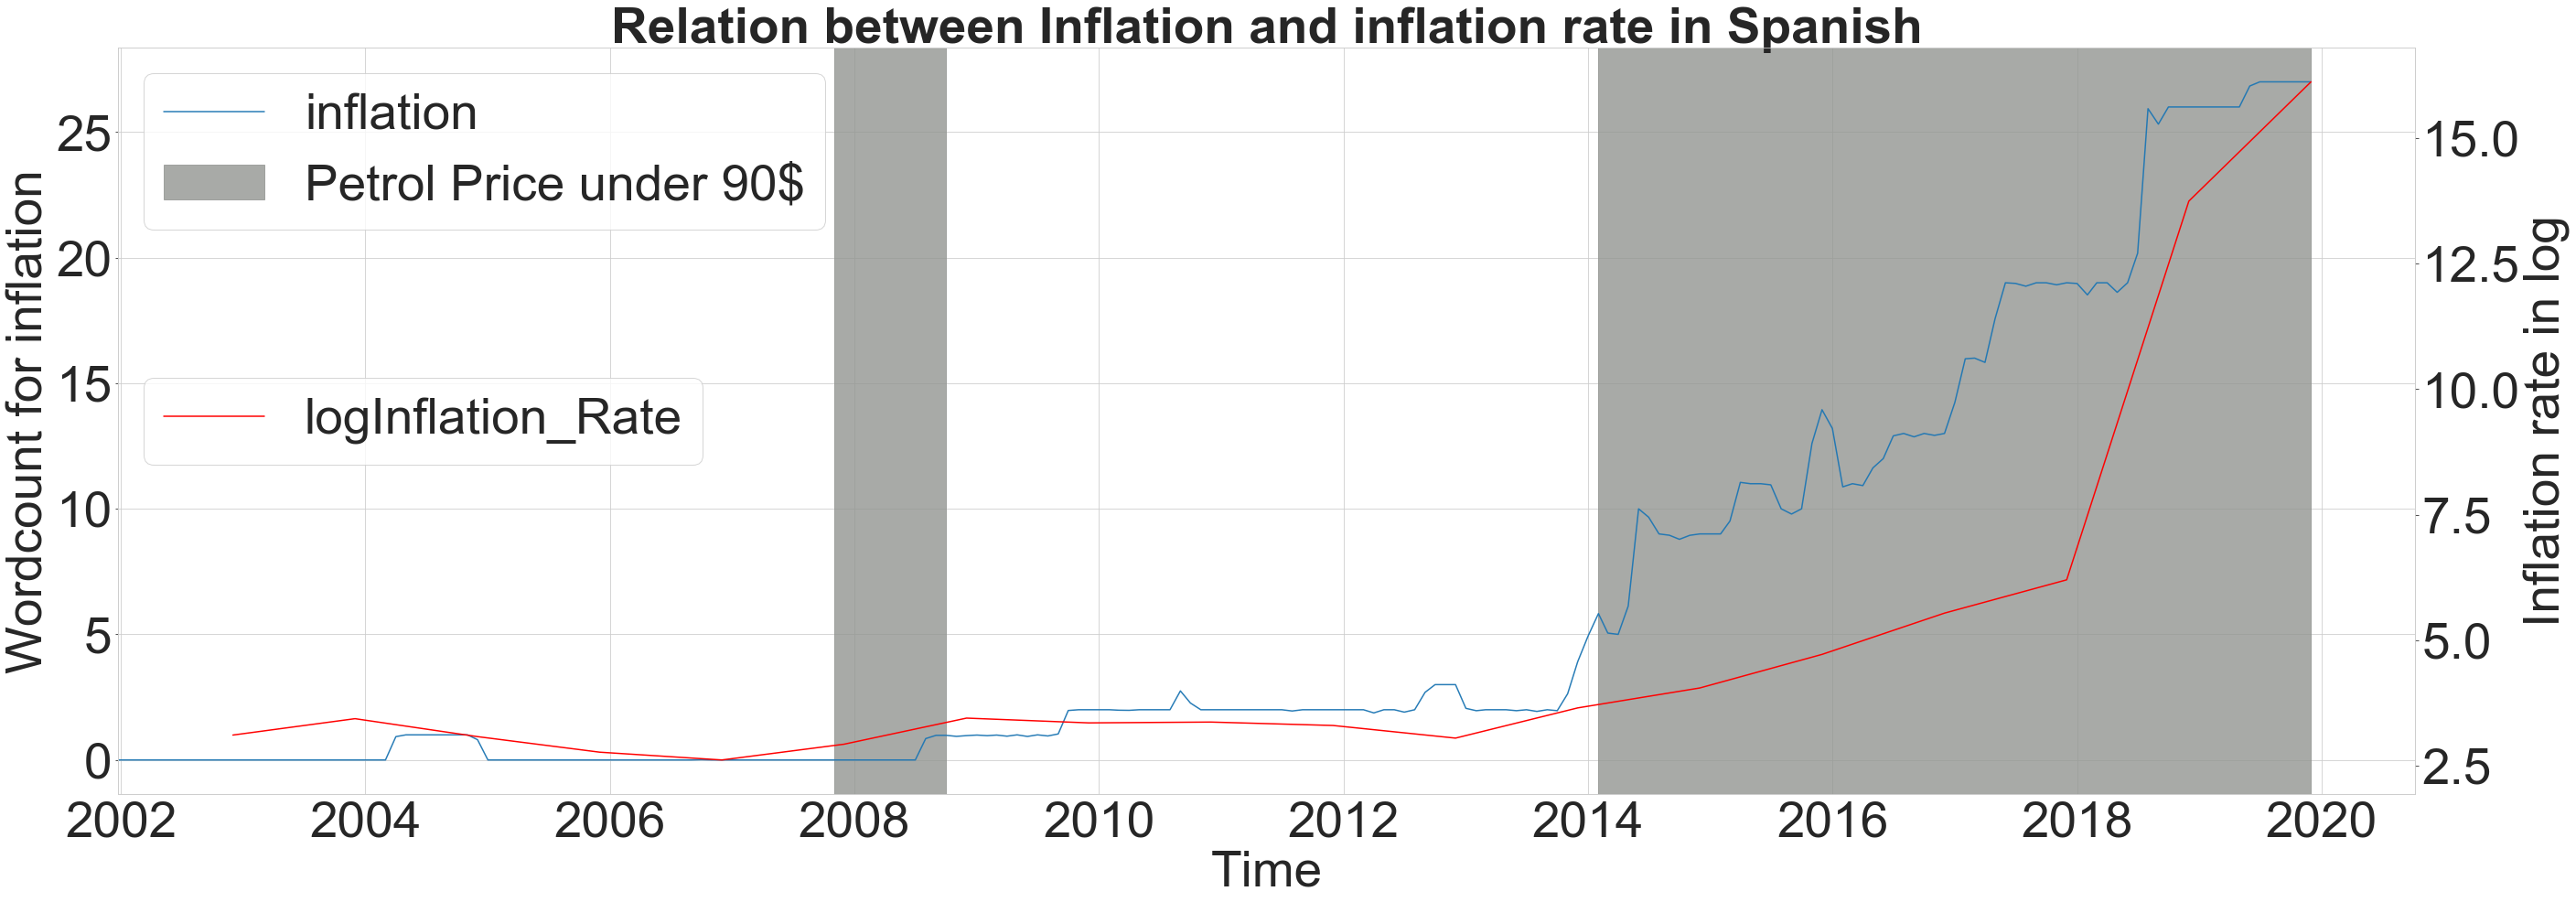

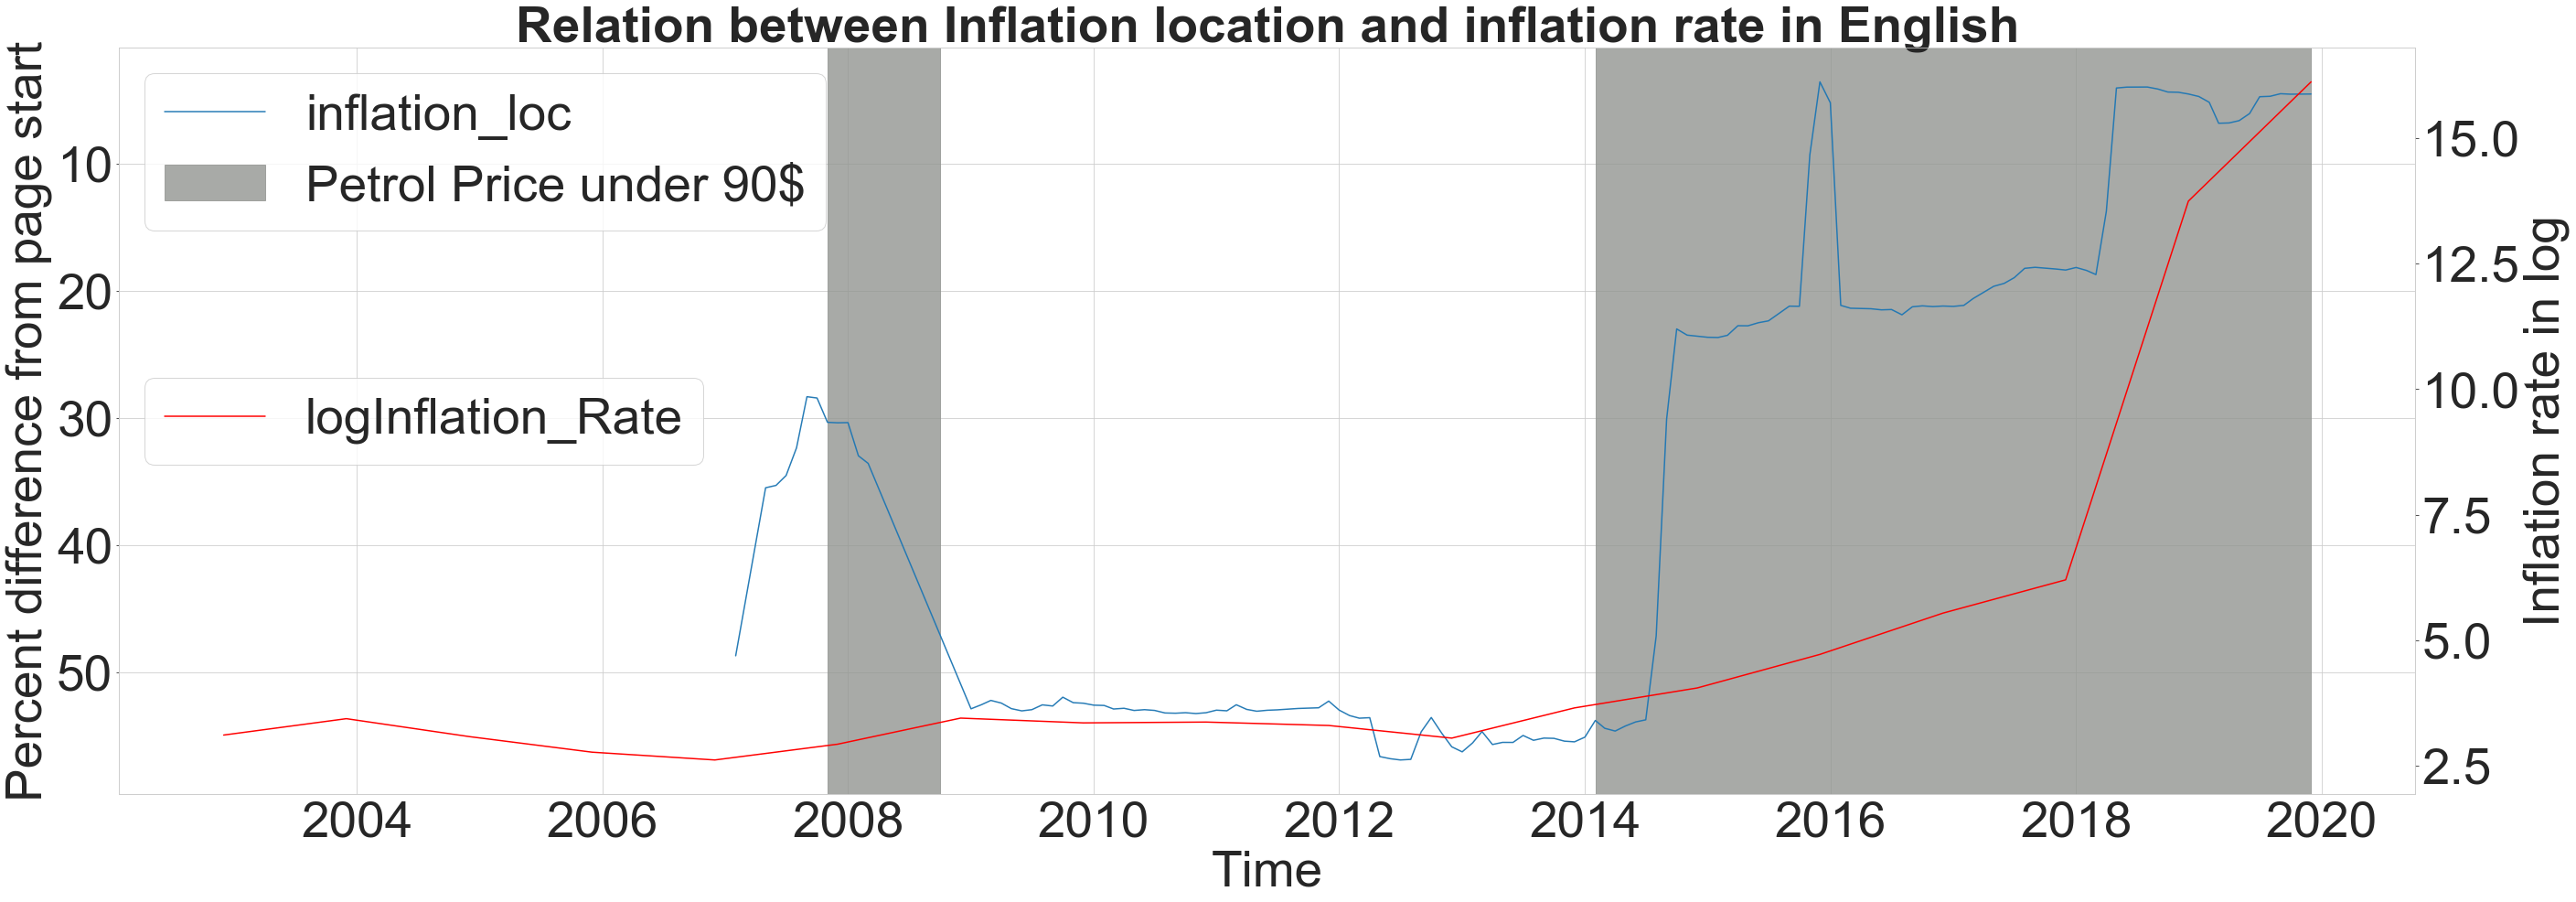

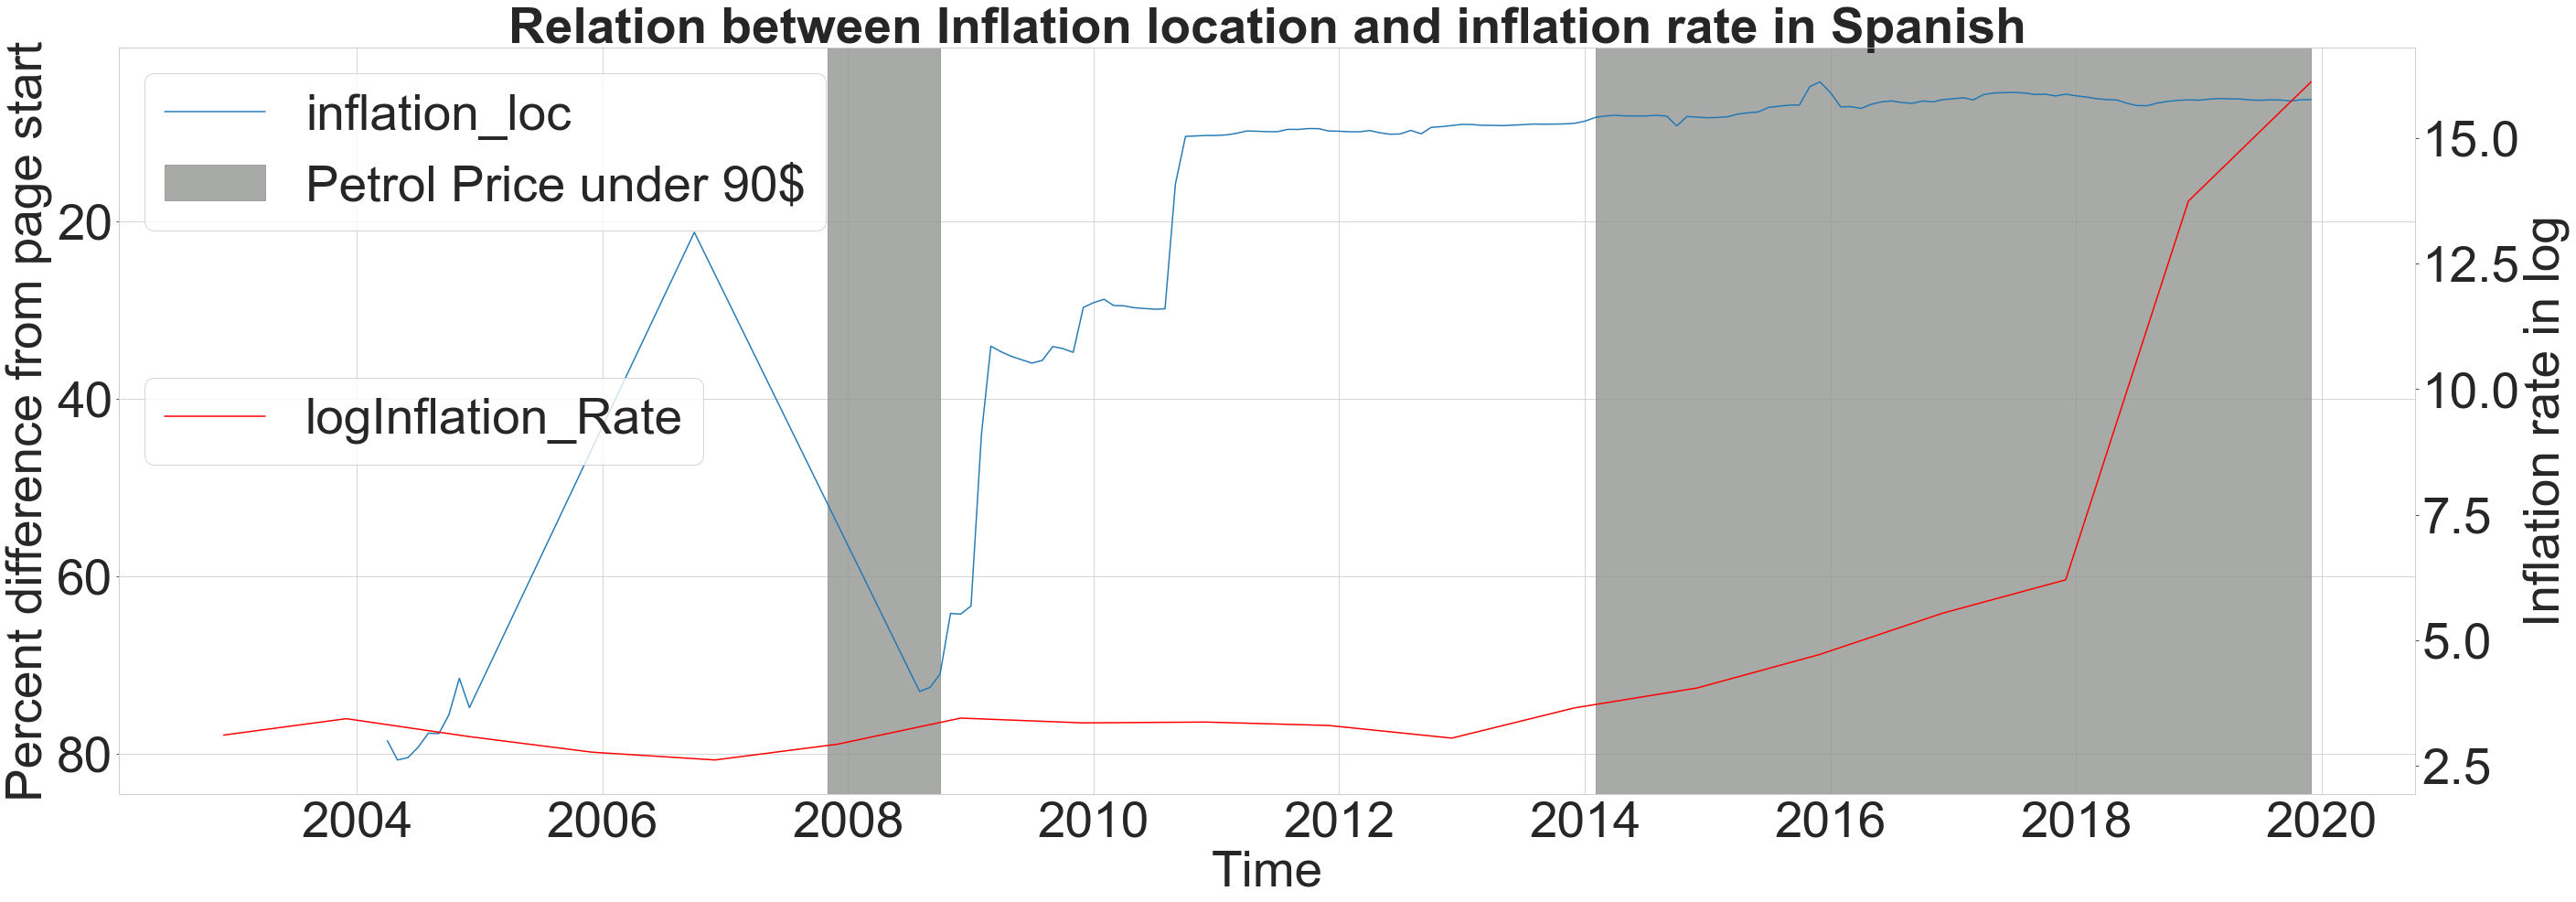

In [12]:
plotter.interactionCommonPlot([complete_en,complete_es],variable_pair=["inflation","logInflation_Rate"],show_differences =False)
plotter.interactionCommonPlot([complete_en,complete_es],variable_pair=["inflation_loc","logInflation_Rate"],show_differences =False)

### Crisis and petrol price

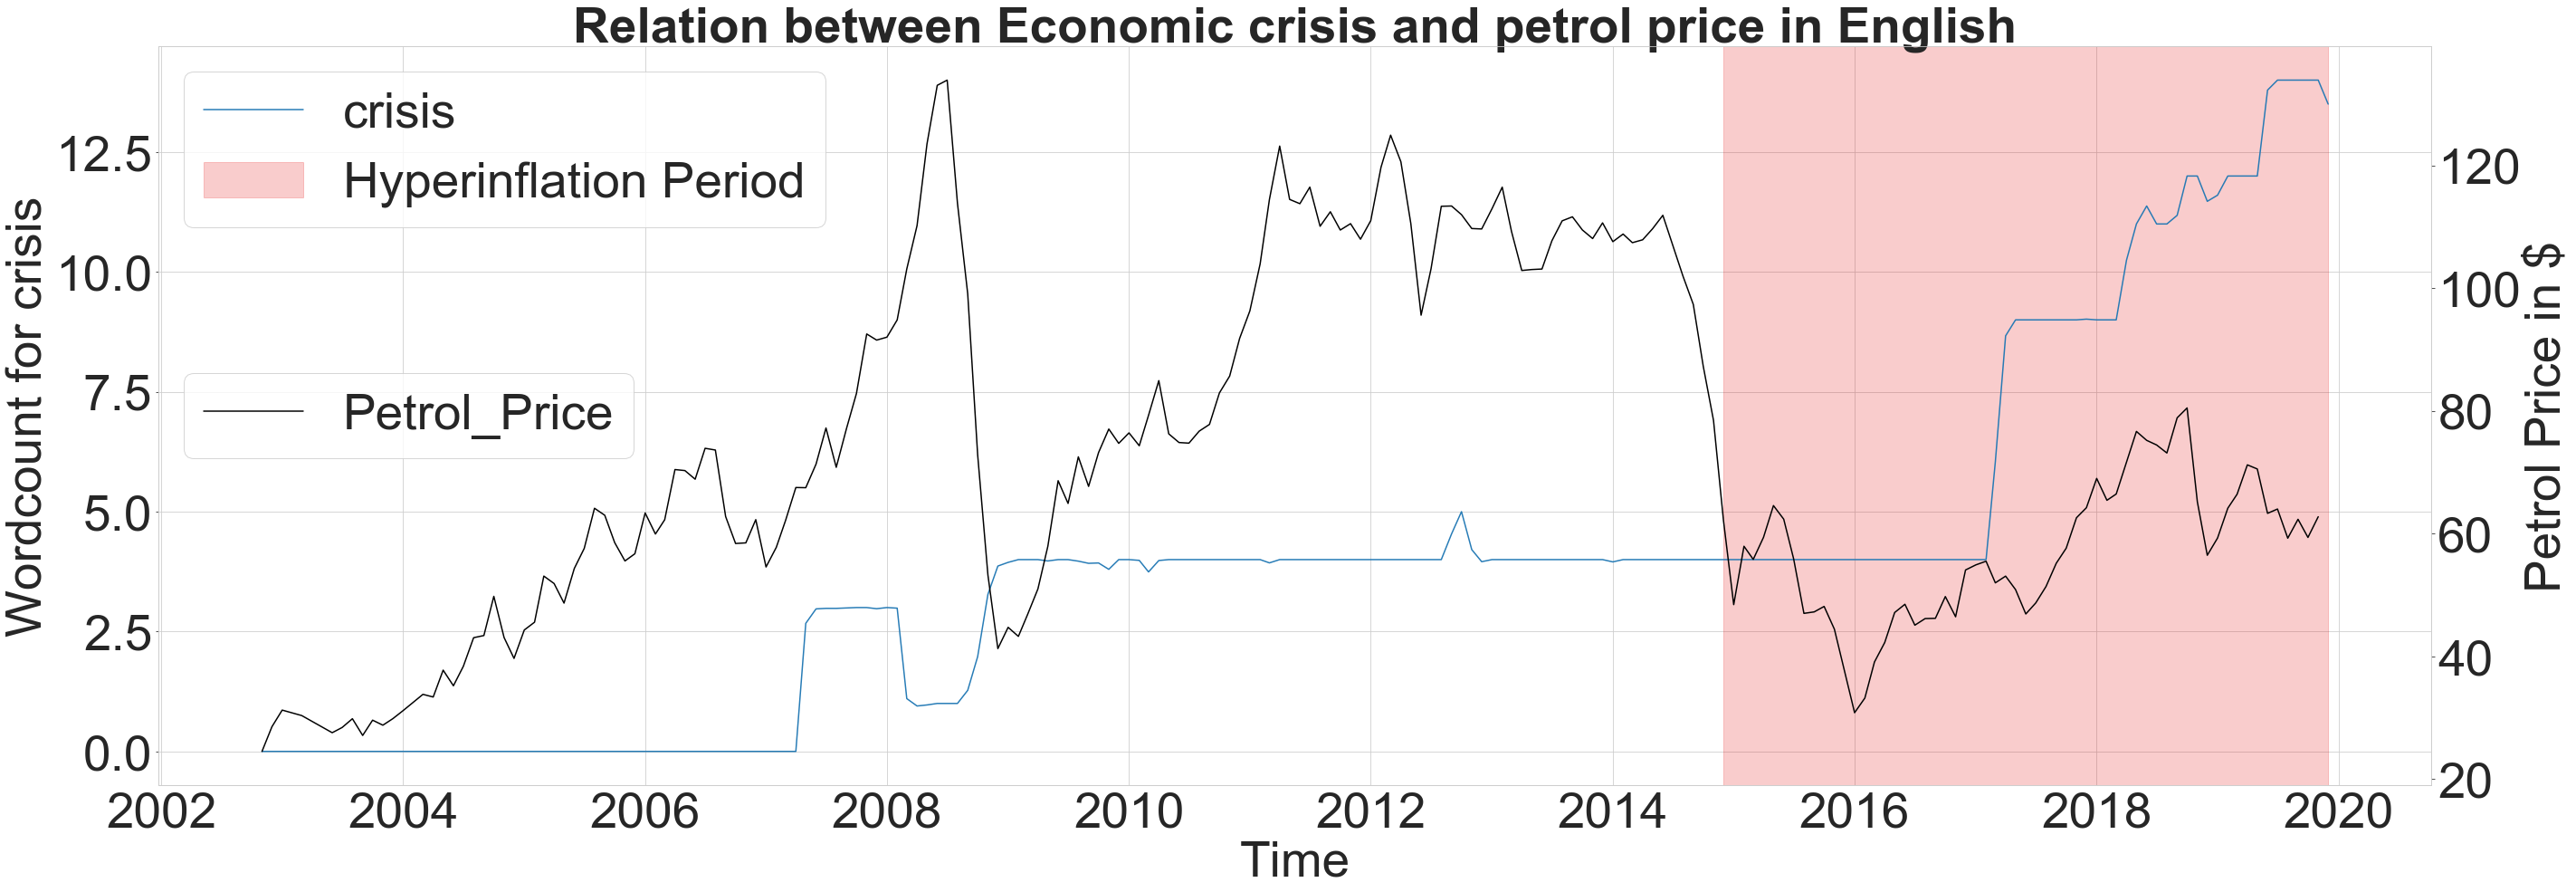

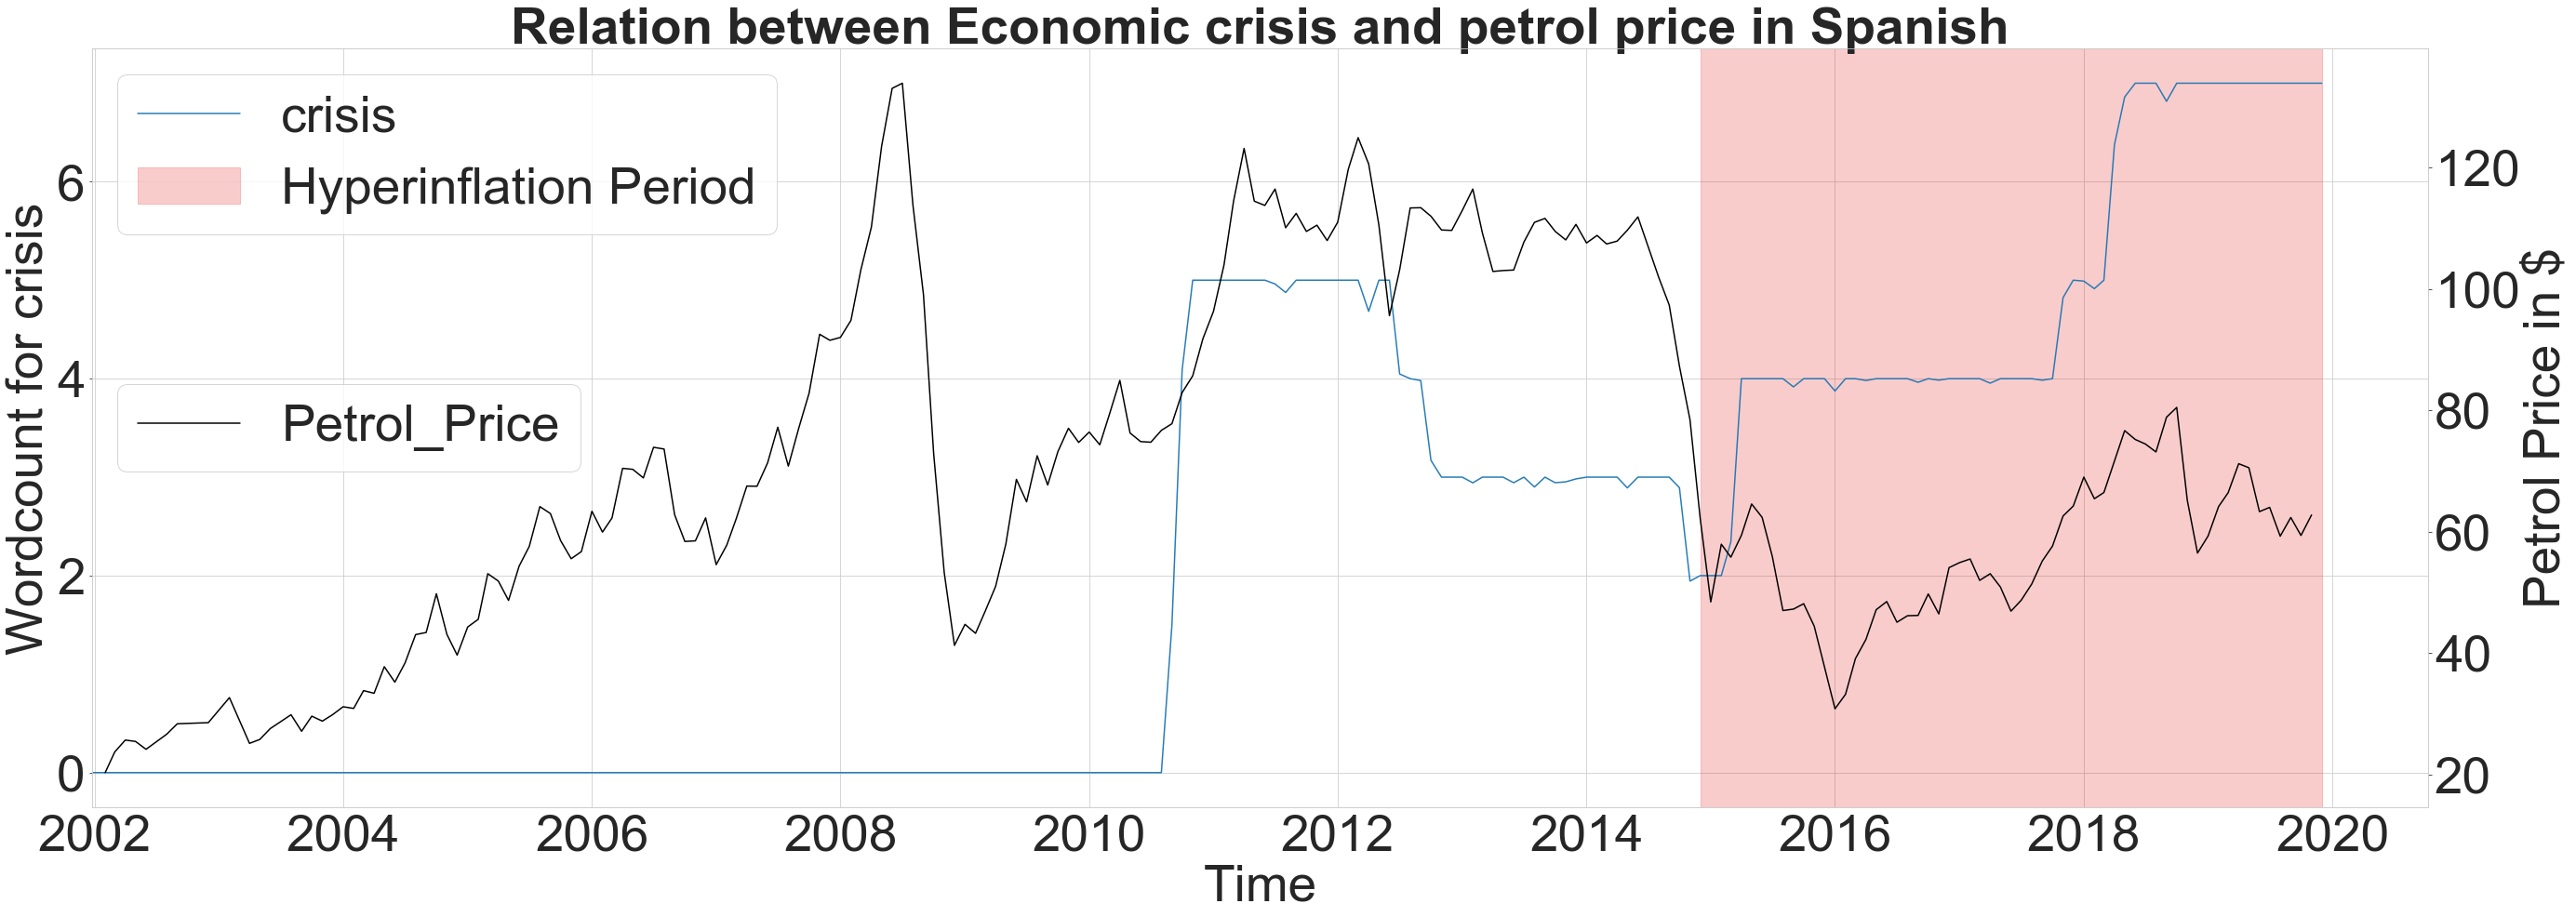

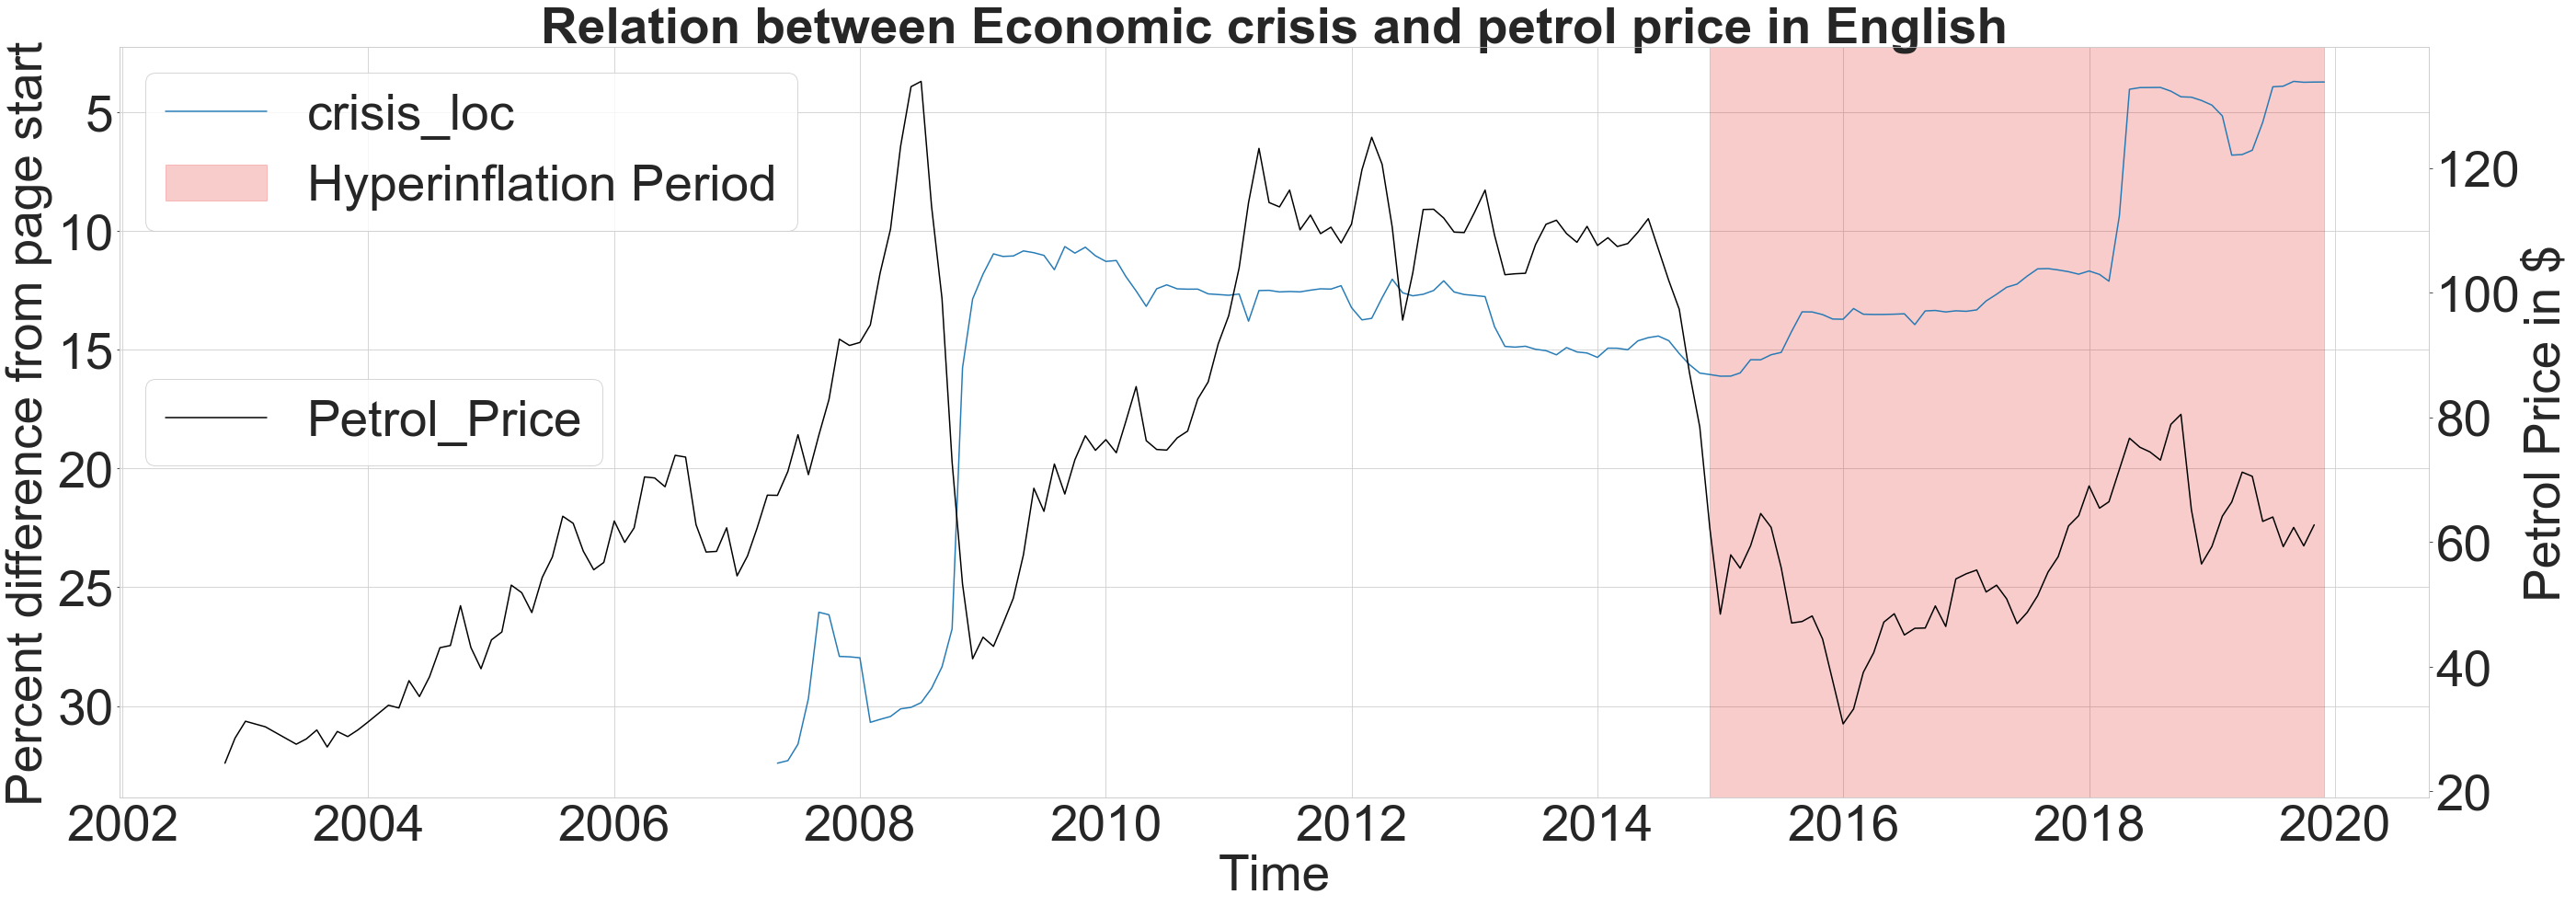

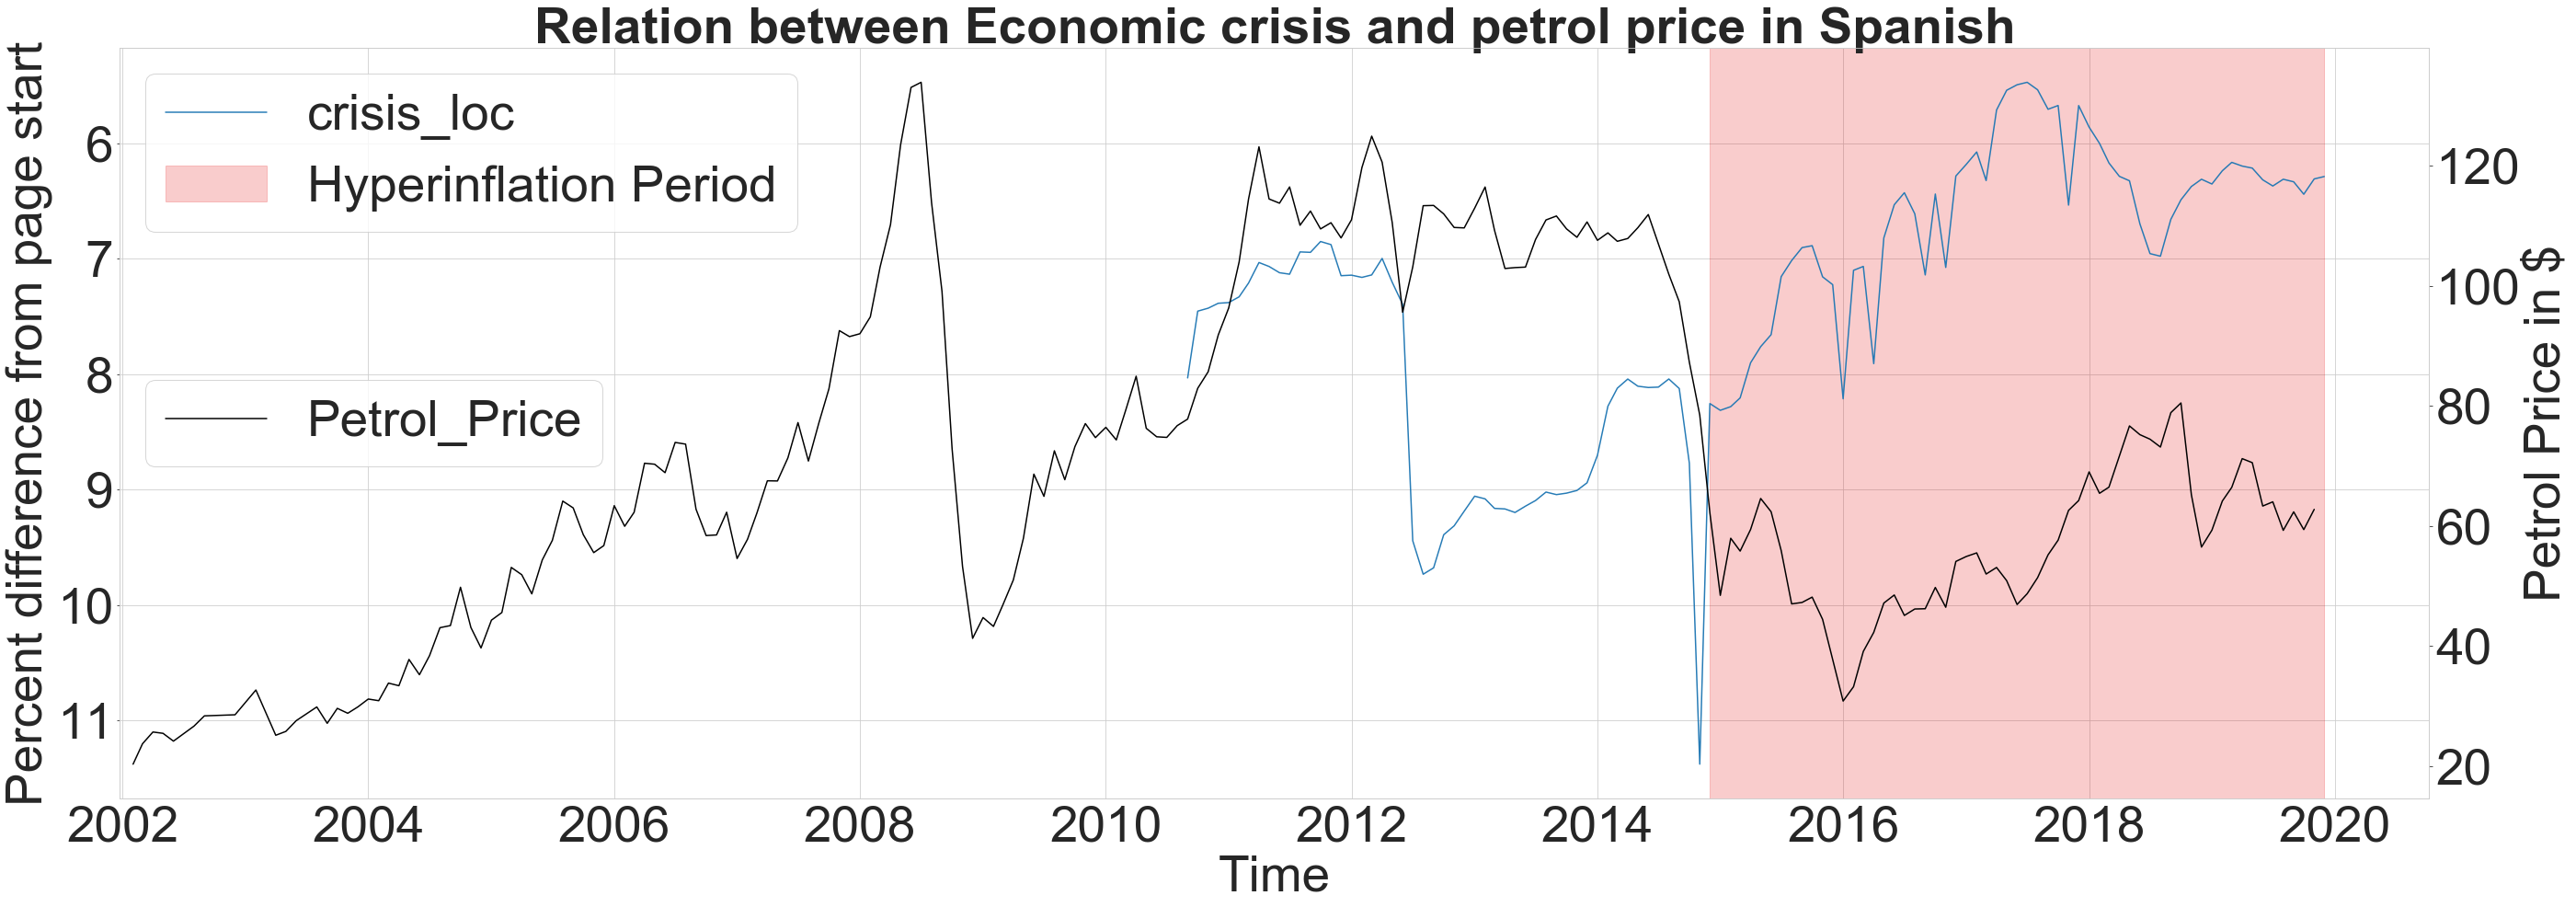

In [13]:
plotter.interactionCommonPlot([complete_en,complete_es],variable_pair=["crisis","Petrol_Price"],show_differences =False)
plotter.interactionCommonPlot([complete_en,complete_es],variable_pair=["crisis_loc","Petrol_Price"],show_differences =False)

## Checking if Vandalism has an effect ( very limited )

### For inflation

Plotting the interactions checked for vandalism




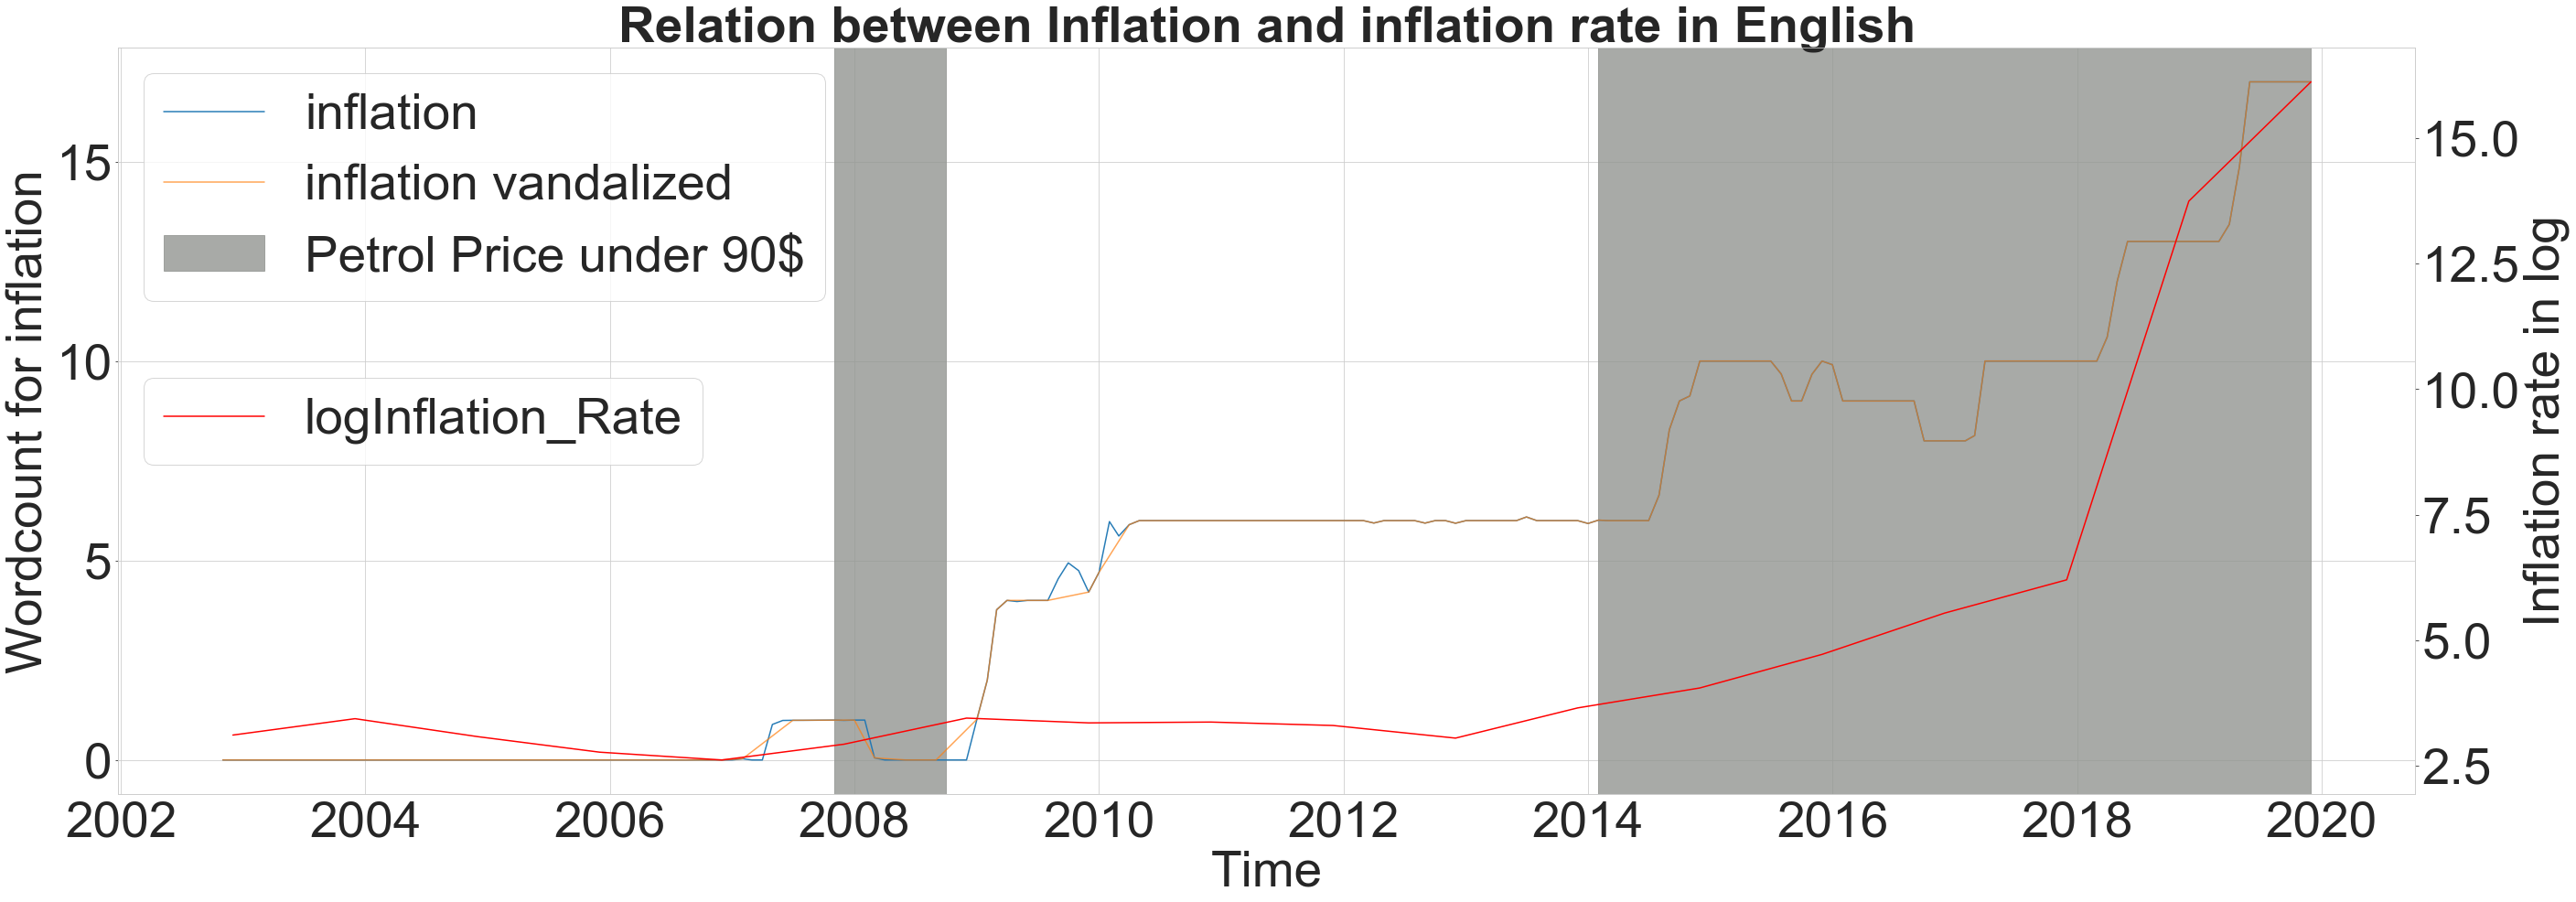

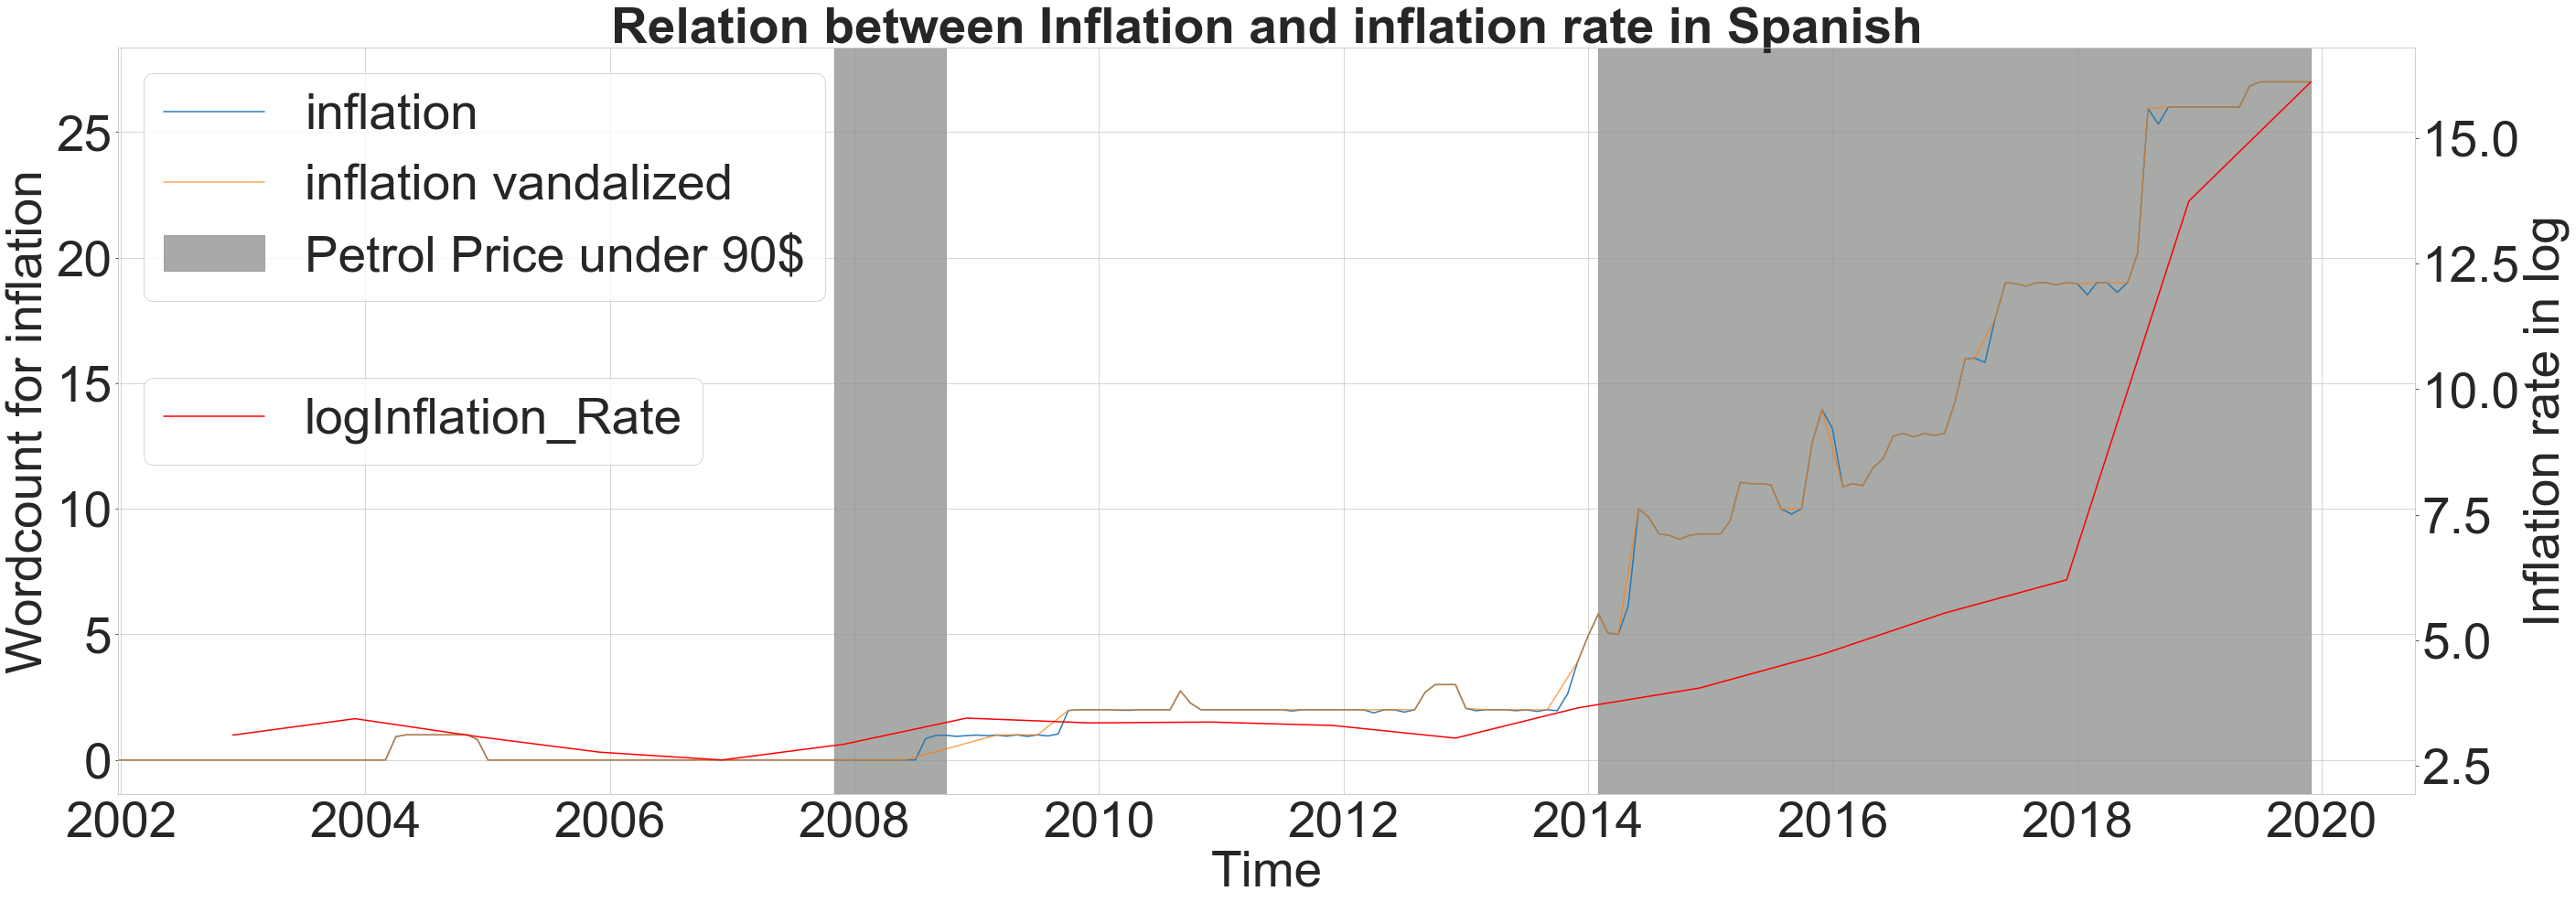

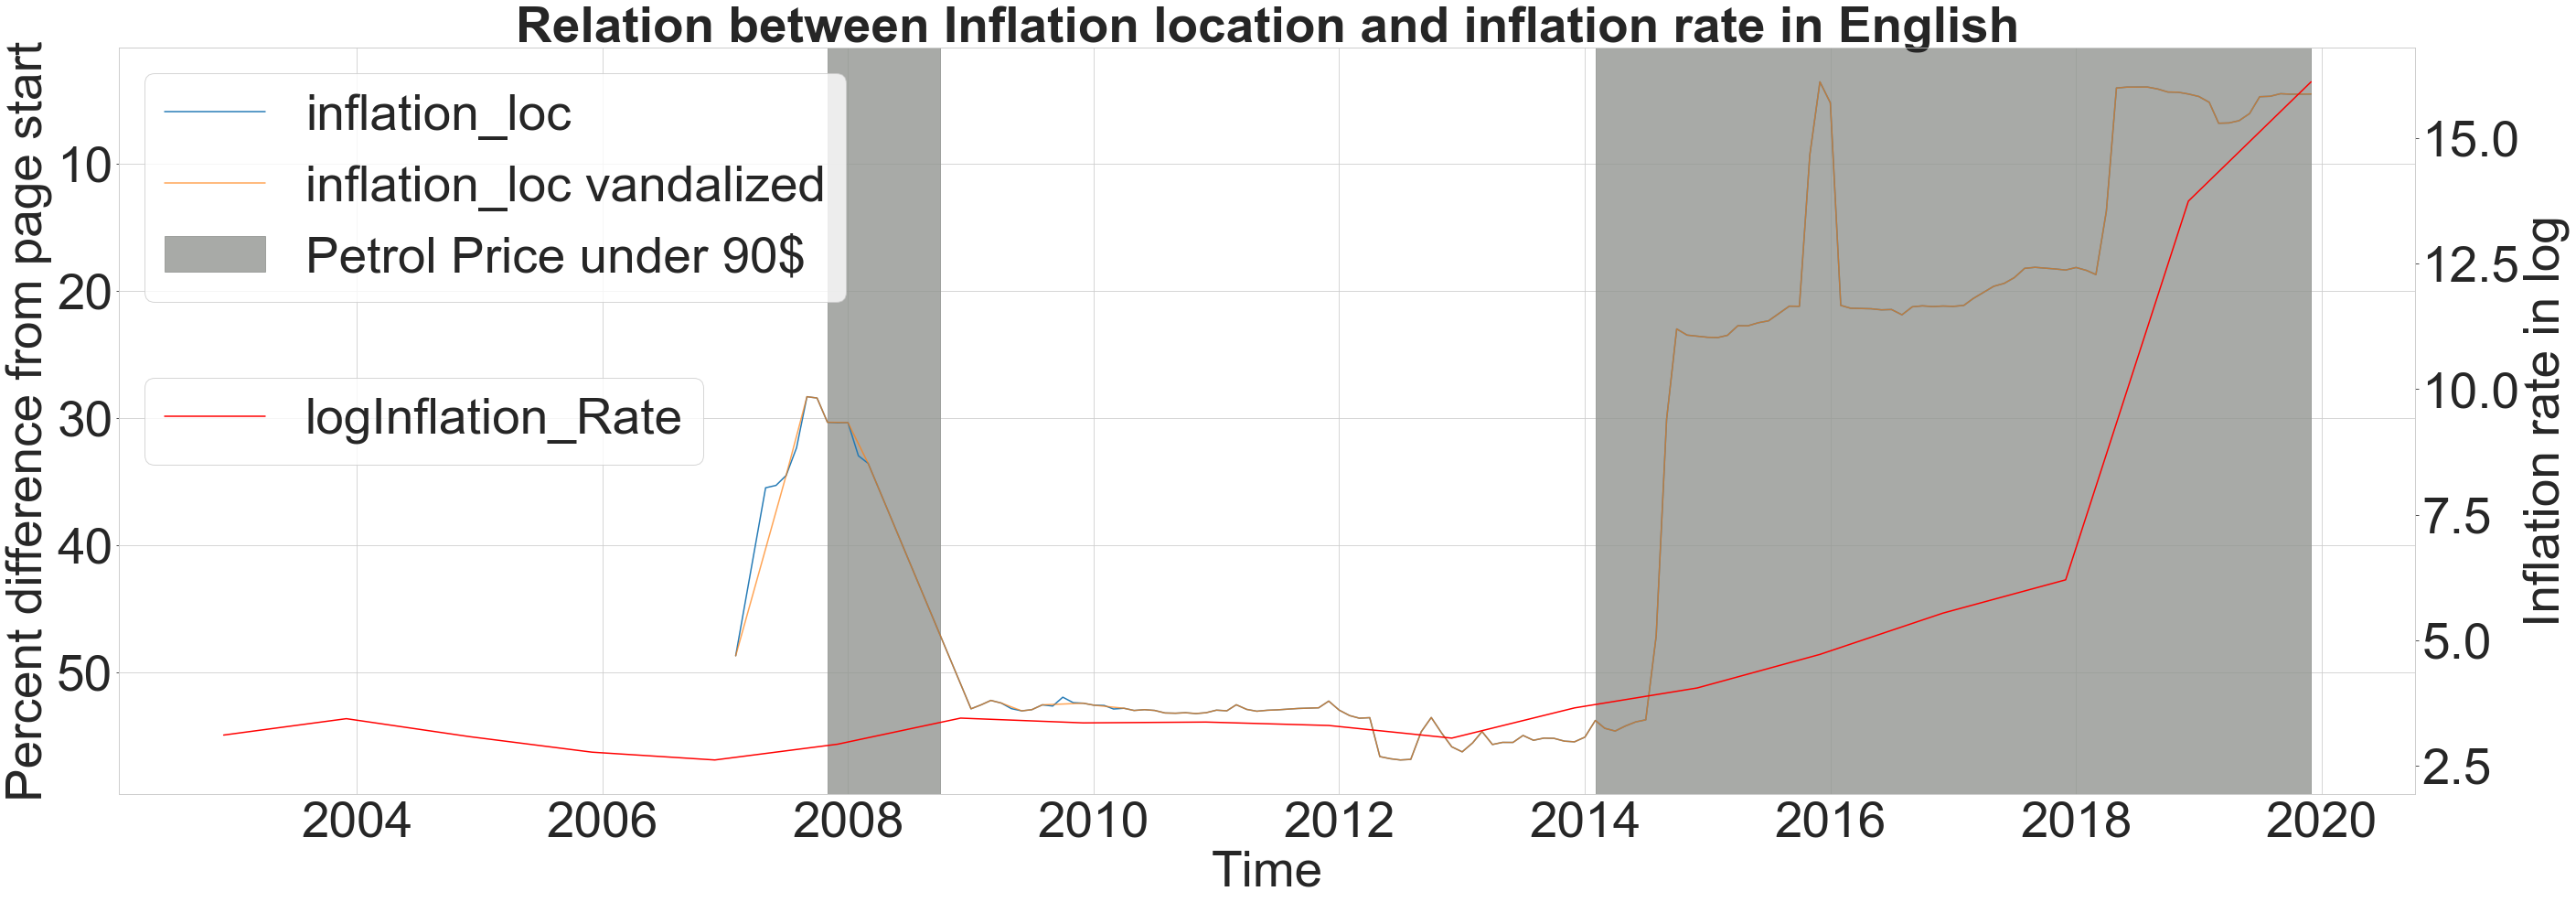

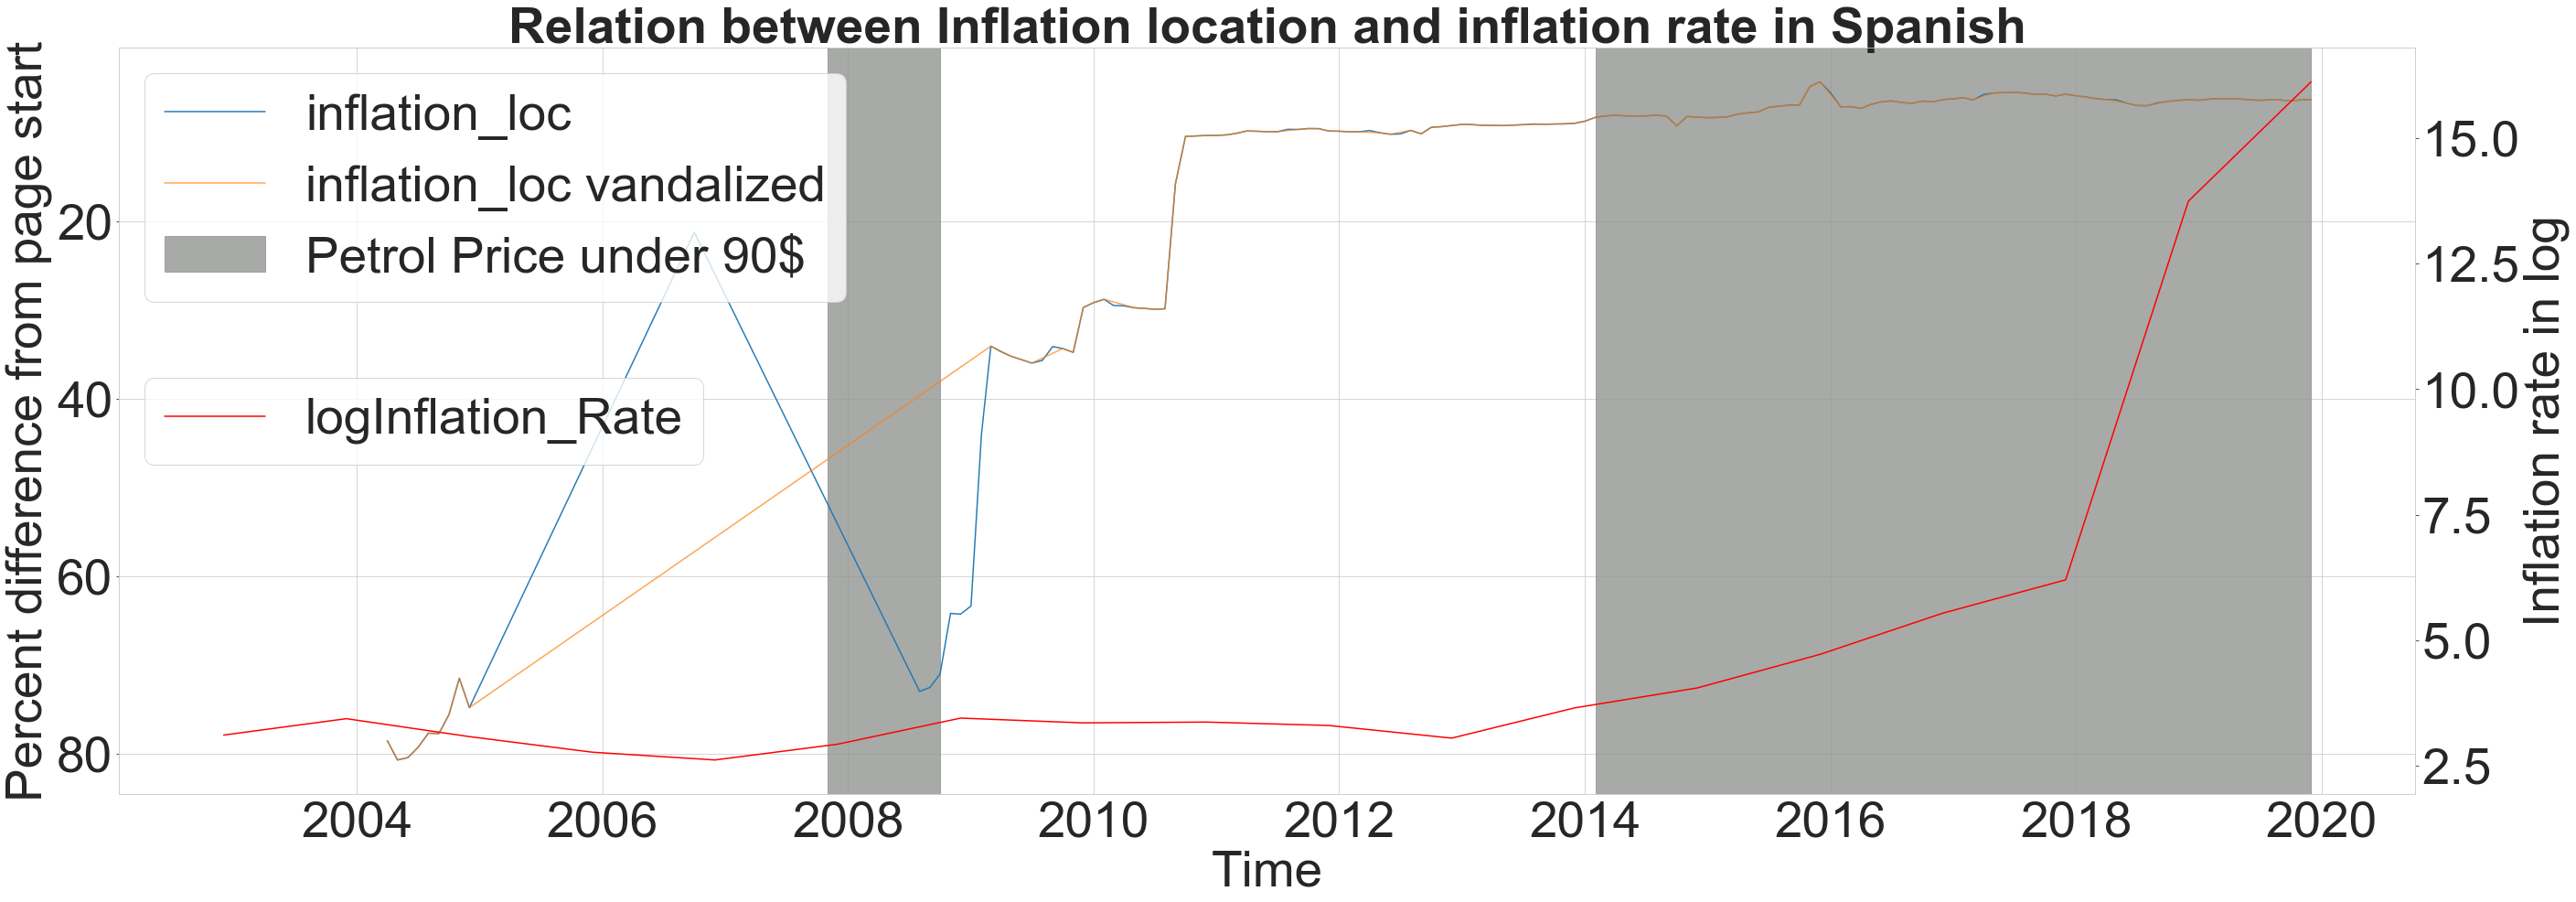

In [14]:
print("Plotting the interactions checked for vandalism\n\n")
plotter.interactionCommonPlot([complete_en,complete_es],variable_pair=["inflation","logInflation_Rate"],show_differences =True)
plotter.interactionCommonPlot([complete_en,complete_es],variable_pair=["inflation_loc","logInflation_Rate"],show_differences =True)

### For crisis

Plotting the interactions checked for vandalism




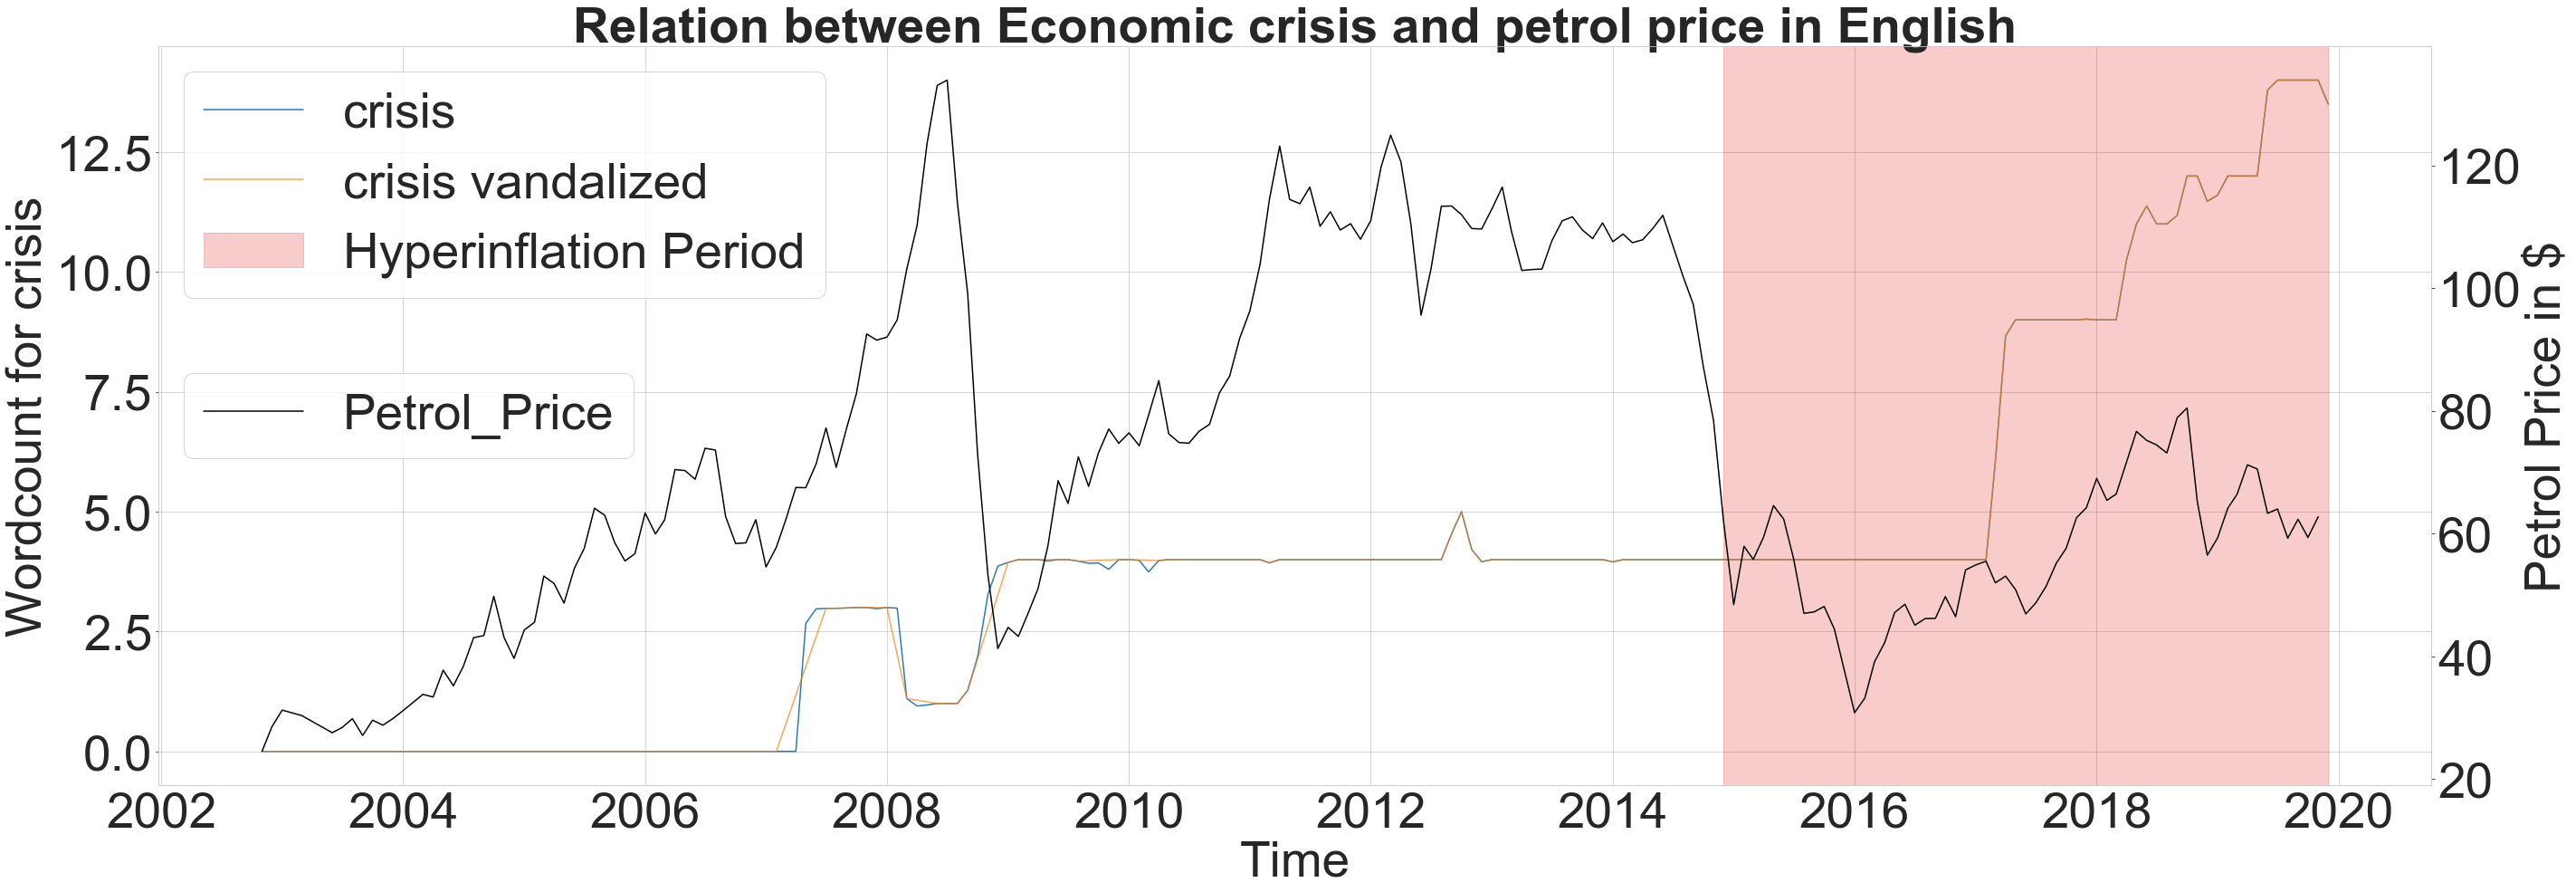

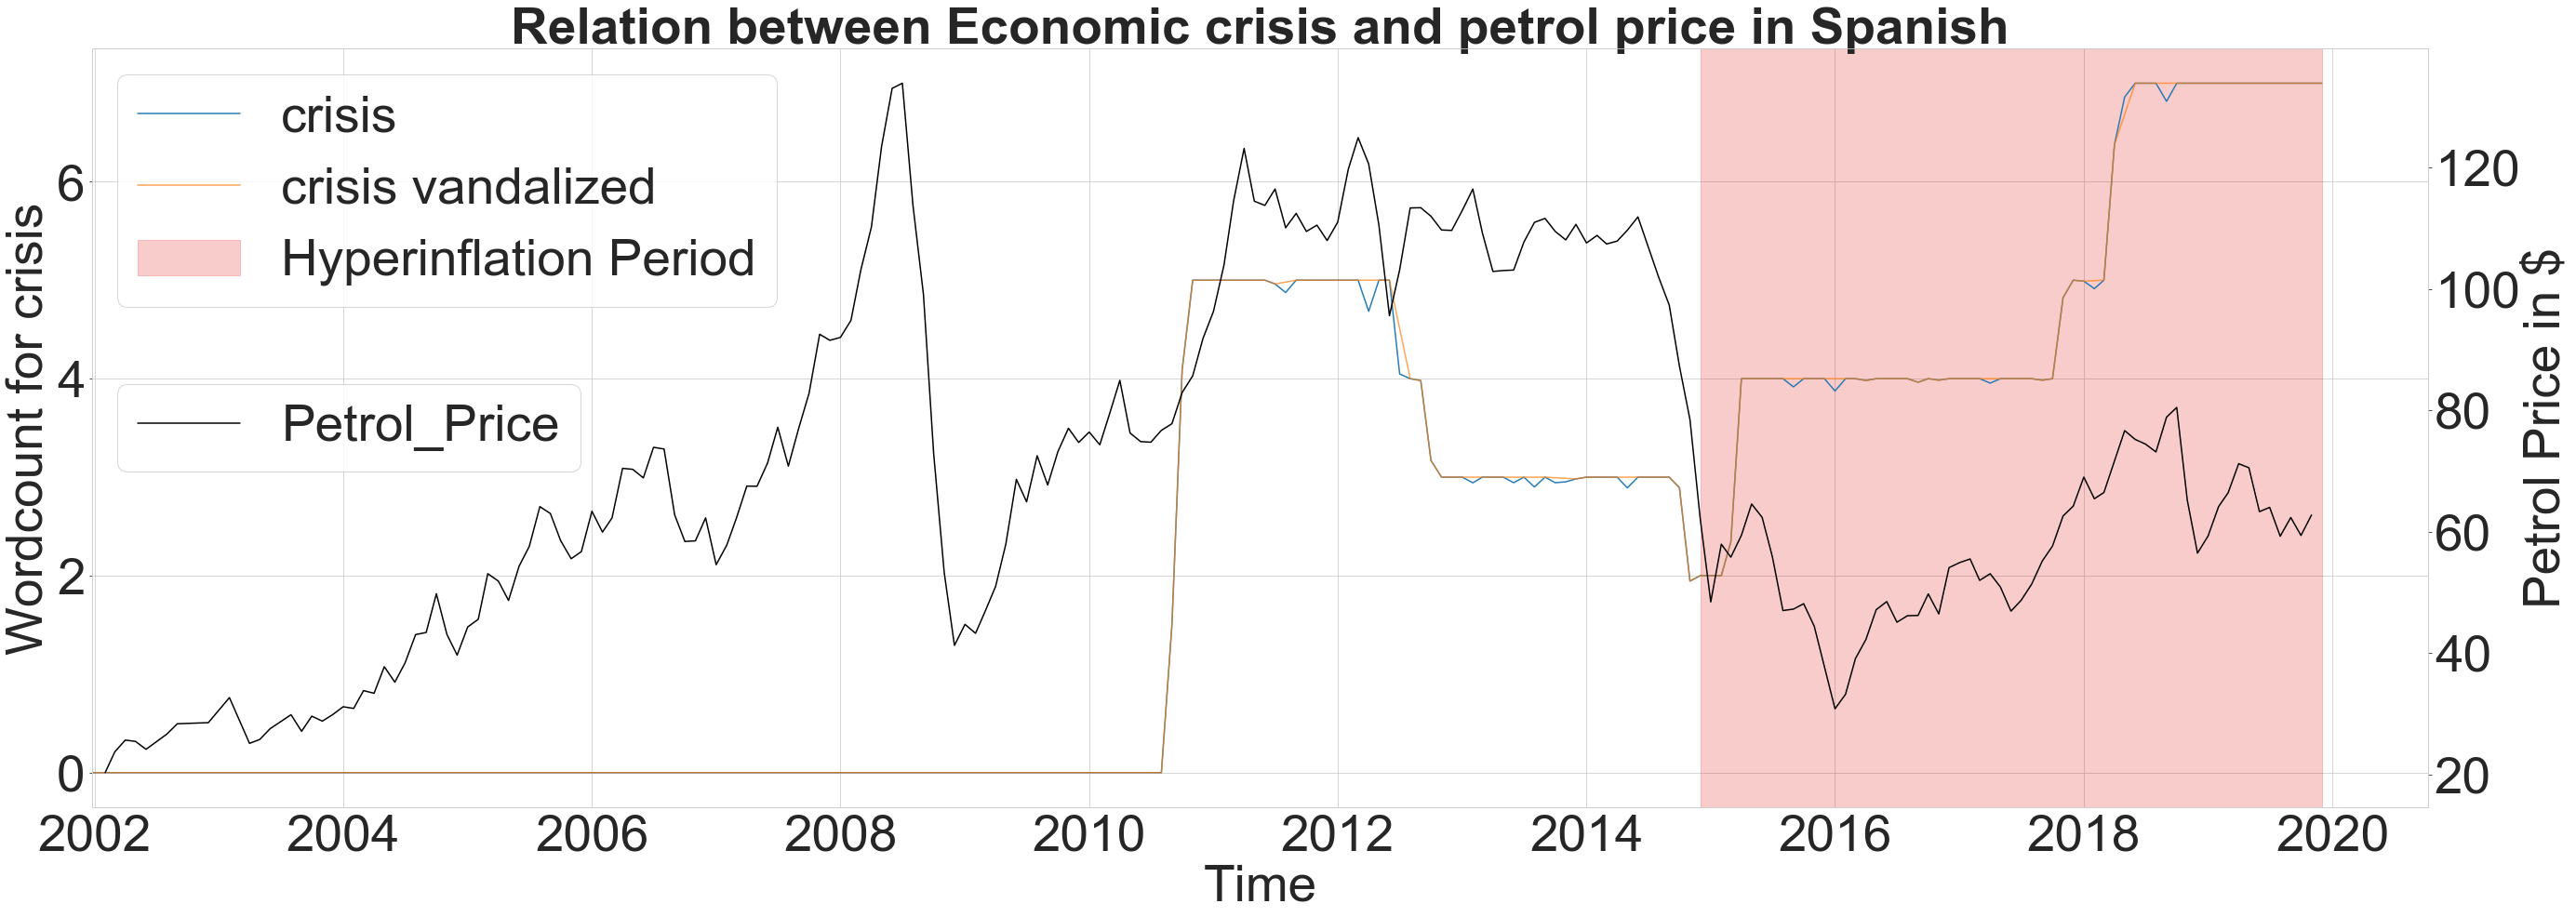

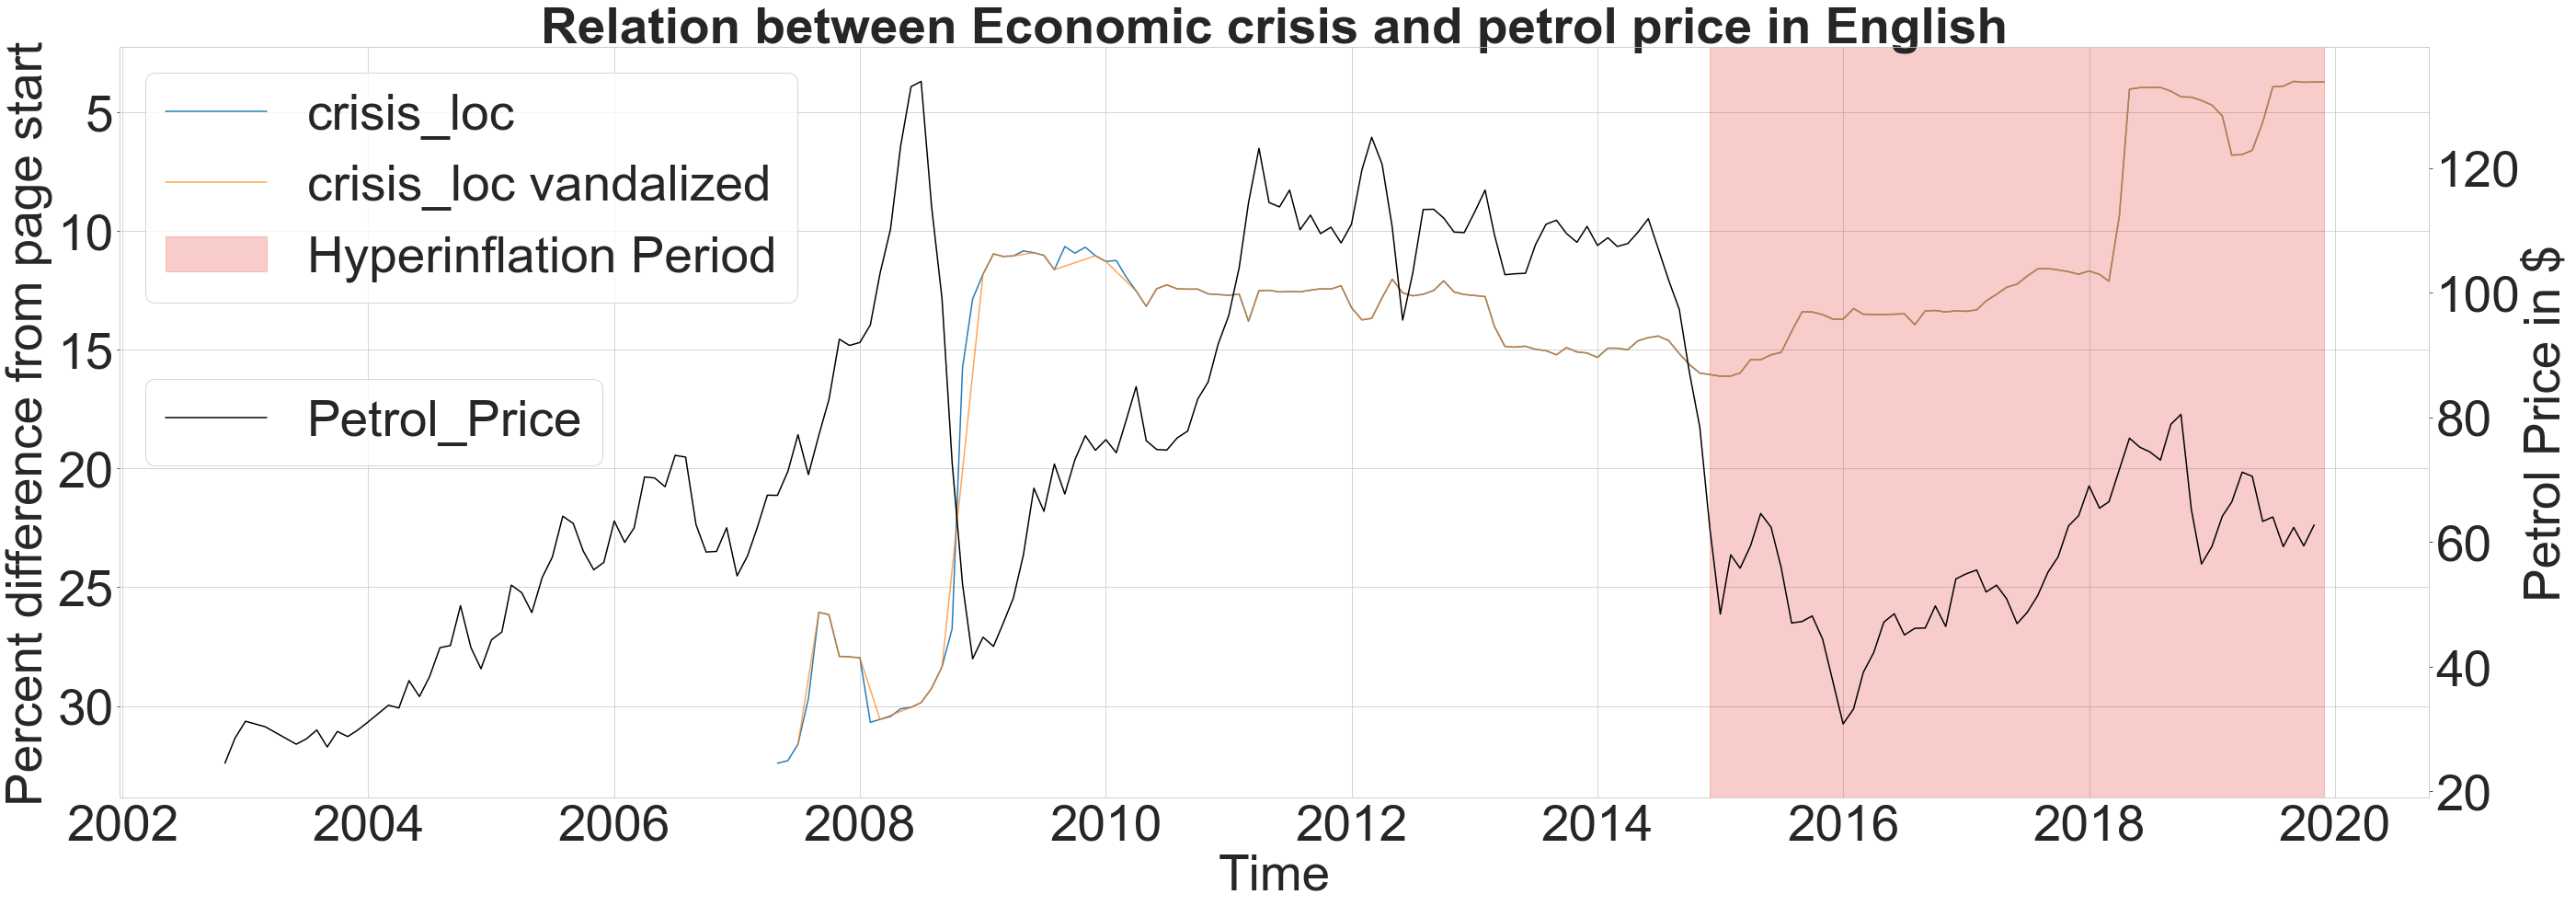

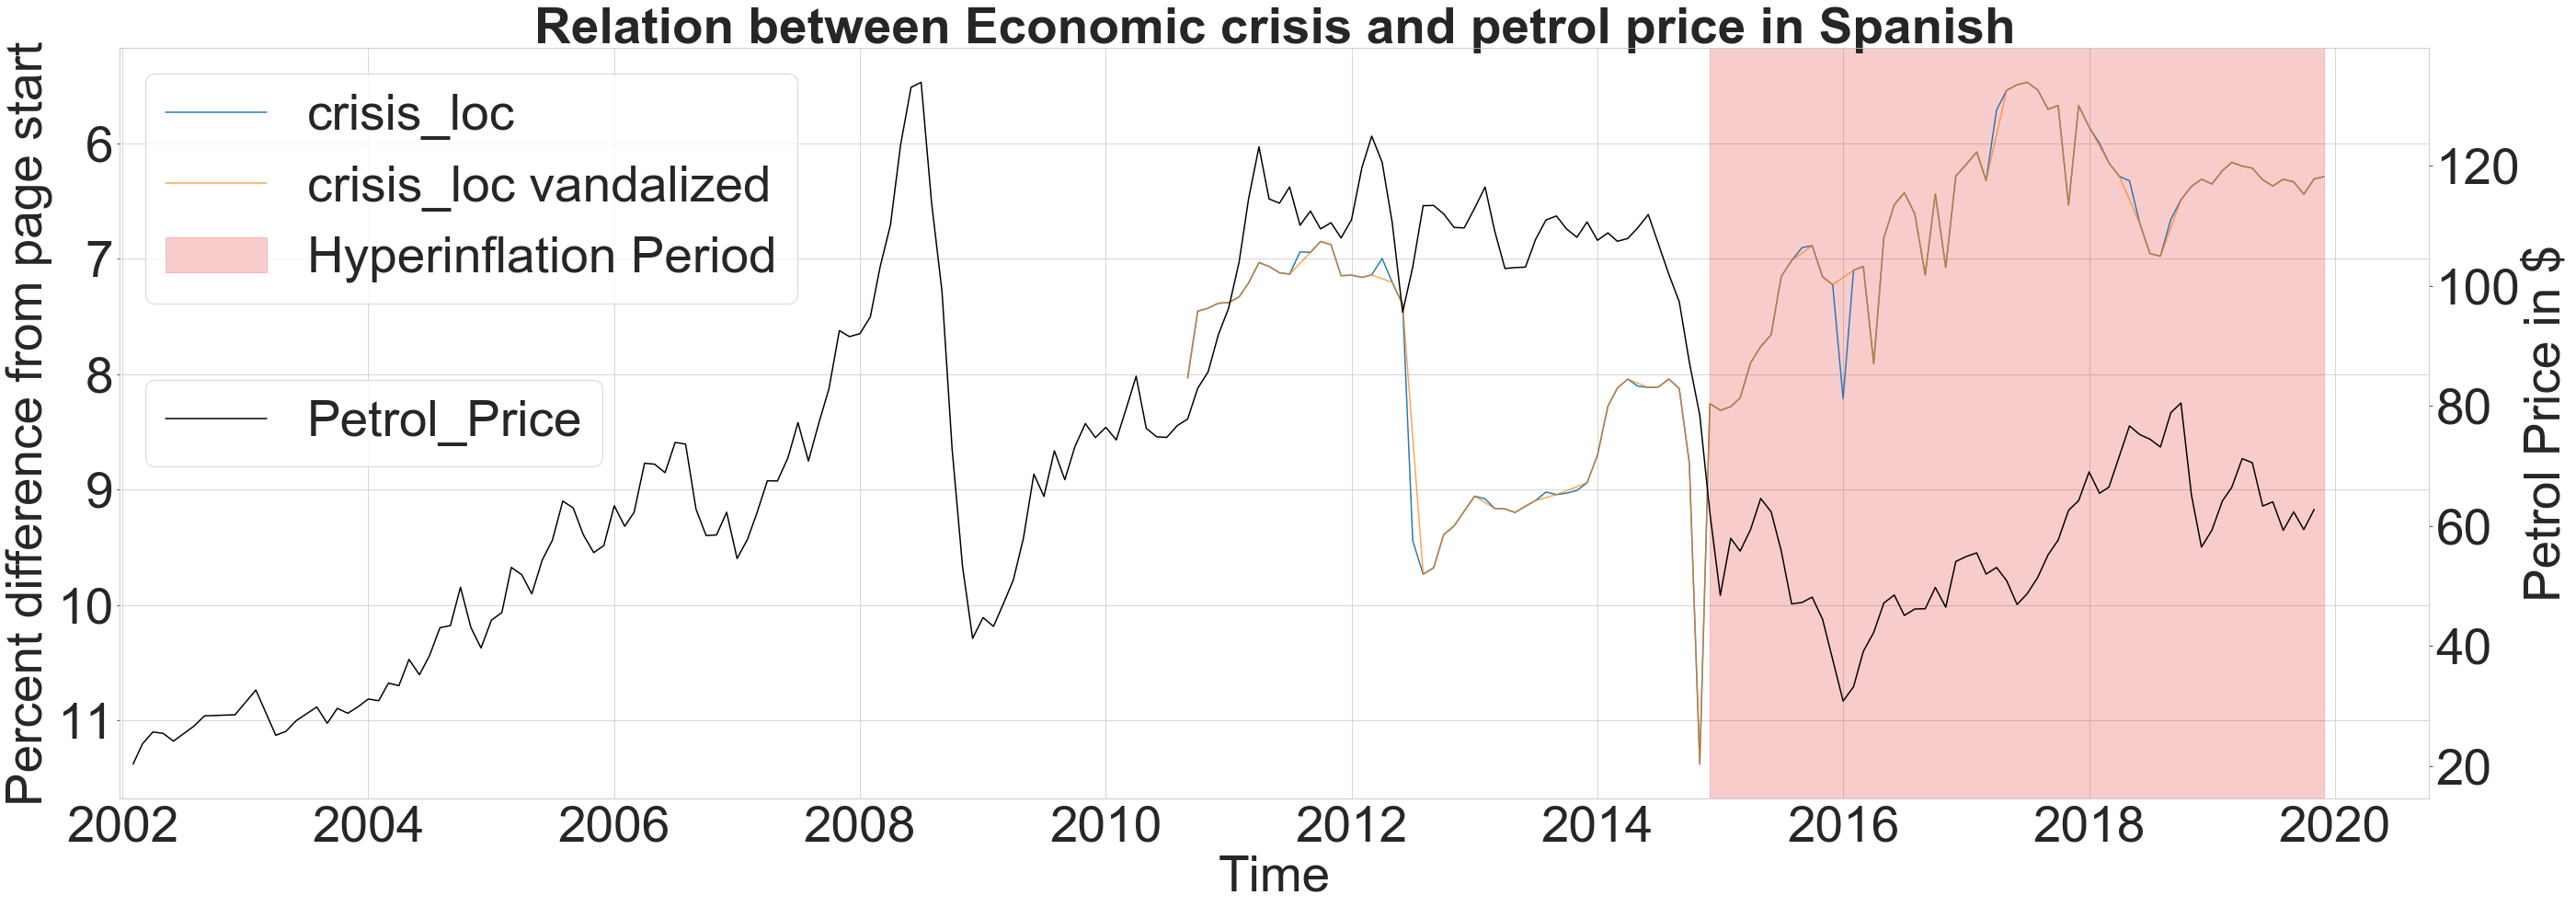

In [15]:
print("Plotting the interactions checked for vandalism\n\n")
plotter.interactionCommonPlot([complete_en,complete_es],variable_pair=["crisis","Petrol_Price"],show_differences =True)
plotter.interactionCommonPlot([complete_en,complete_es],variable_pair=["crisis_loc","Petrol_Price"],show_differences =True)

## Plotting different scales to show why months was chosen

### No grouping or group by day : too volatile and too much noise

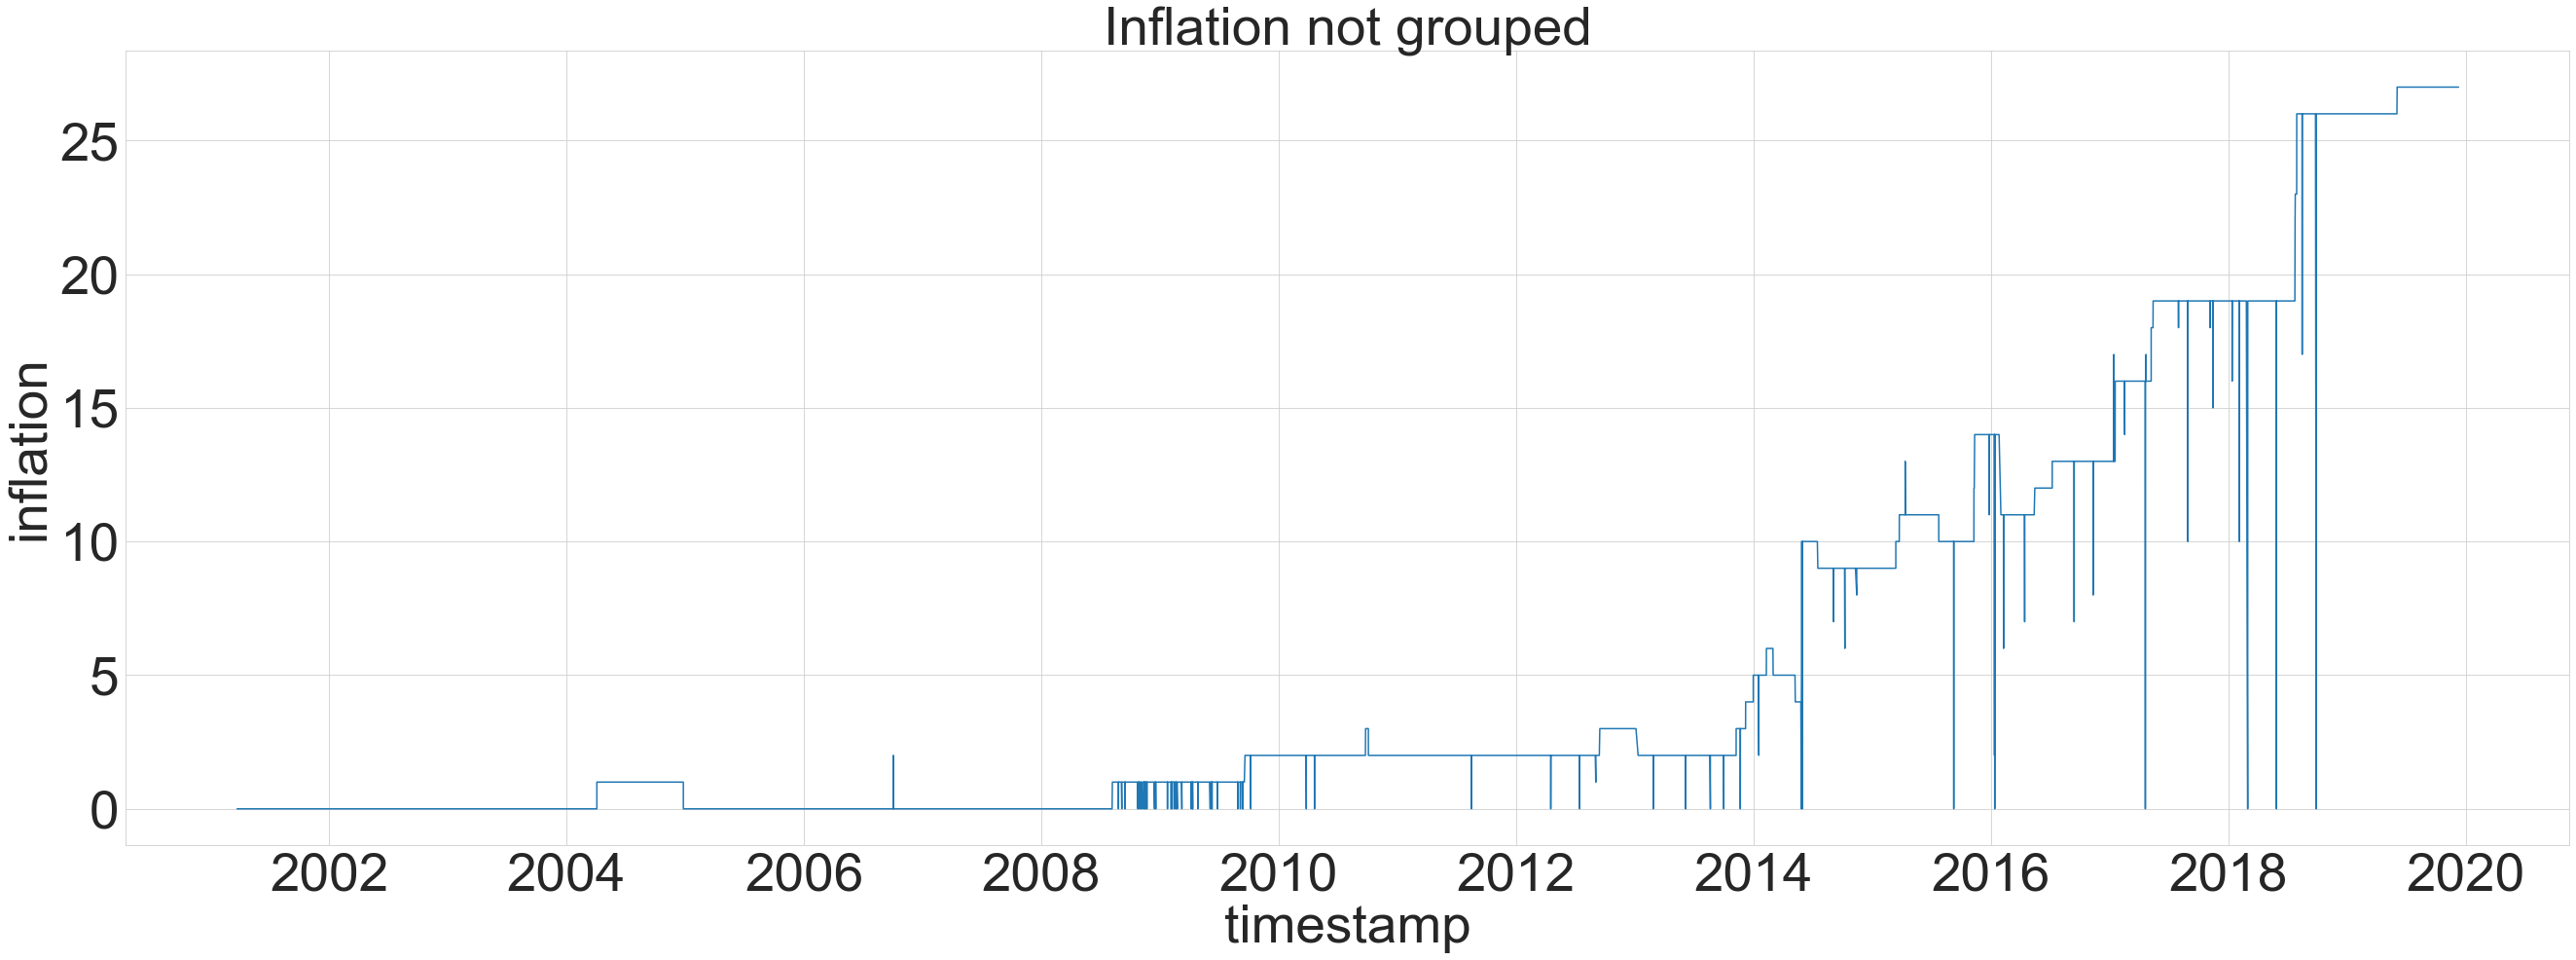

In [16]:
plotter.plotScales(dataframe = df_en, title = "Inflation not grouped",yl="inflation", 
           grouped="day", variable = "inflation")

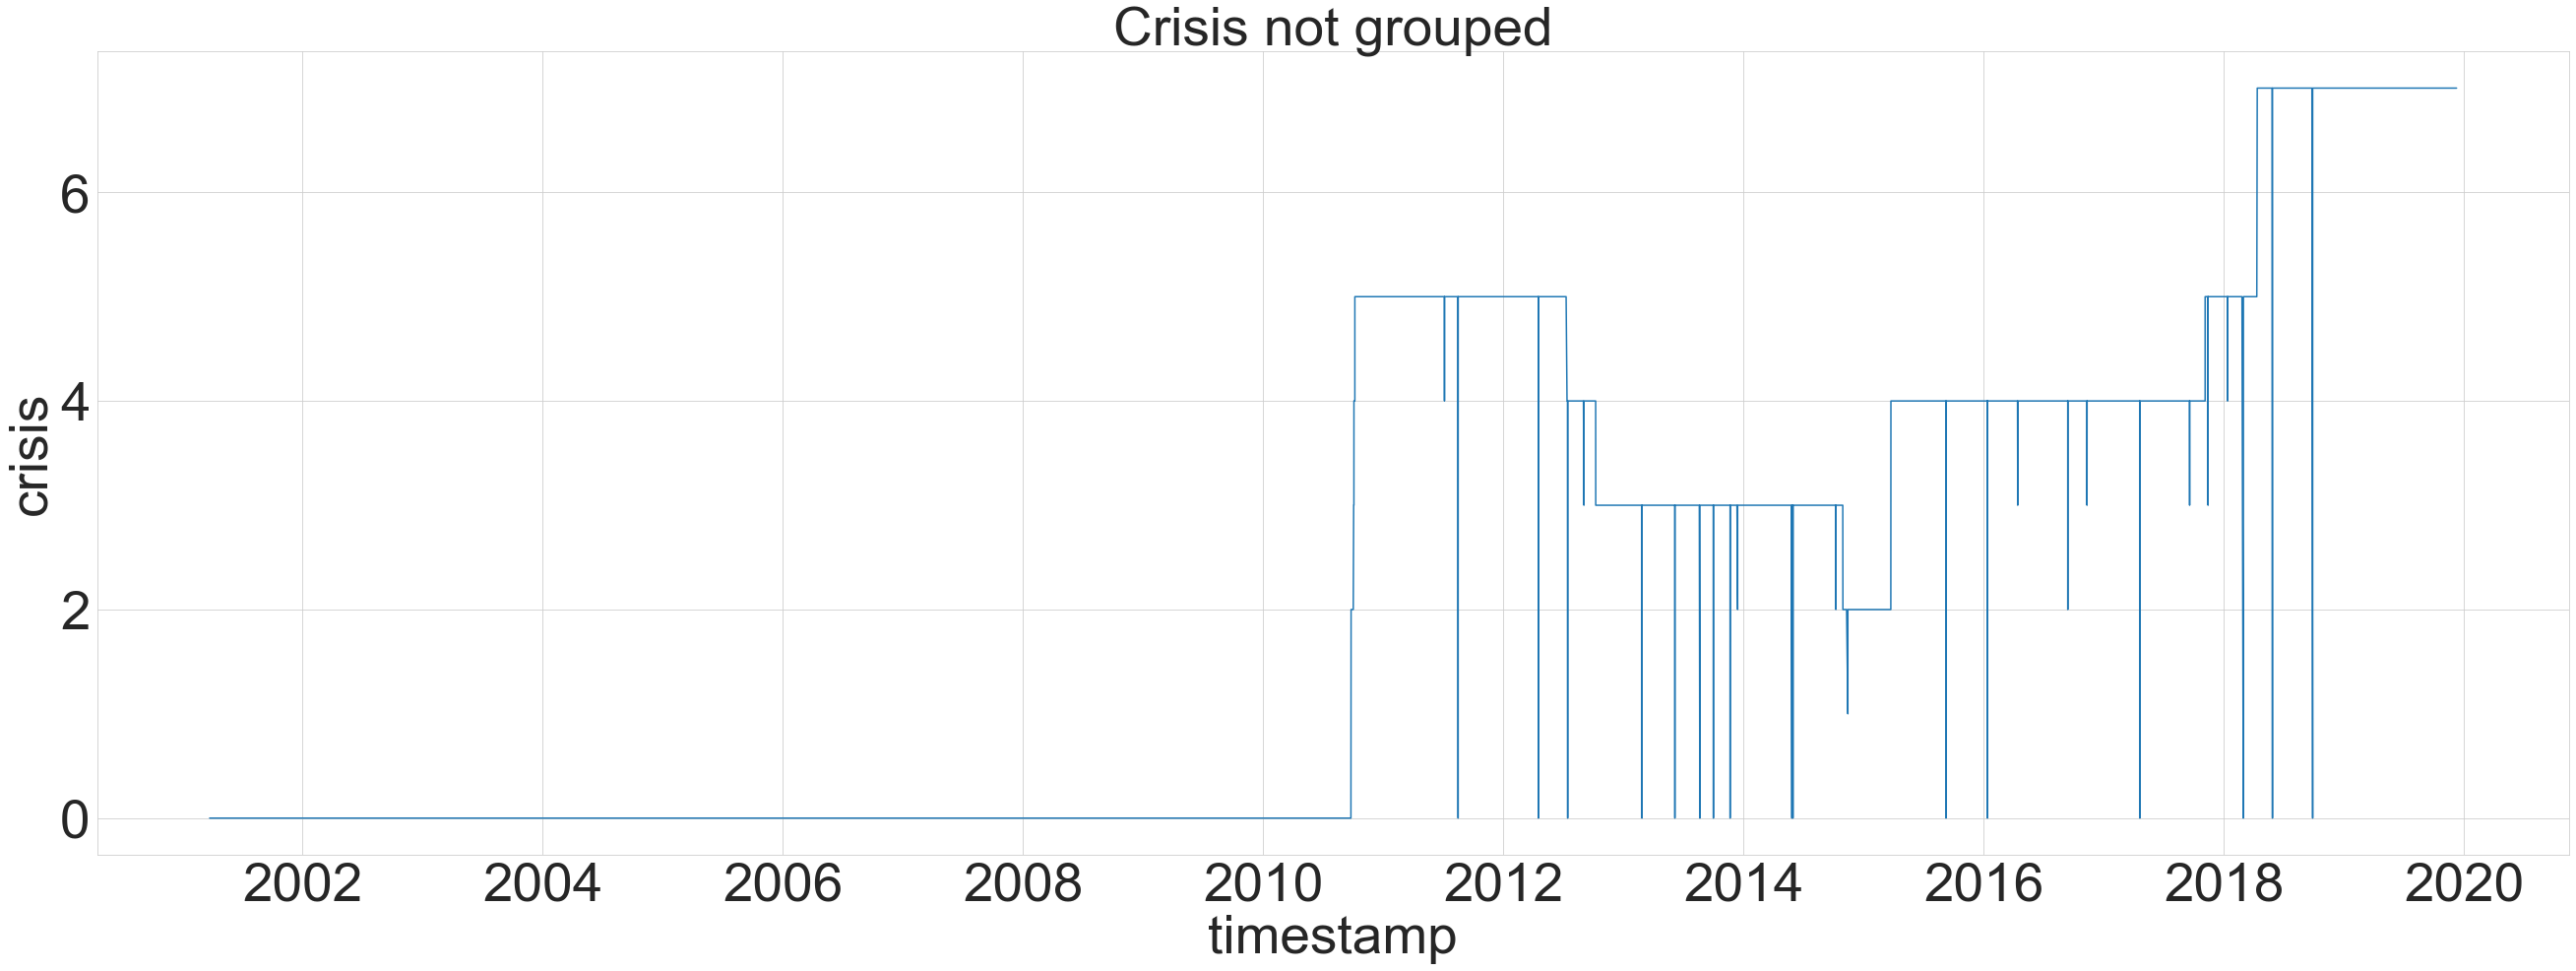

In [17]:
plotter.plotScales(dataframe = df_en, title = "Crisis not grouped",yl="crisis", 
           grouped="day", variable = "crisis")

### Grouping by year : not enough precision

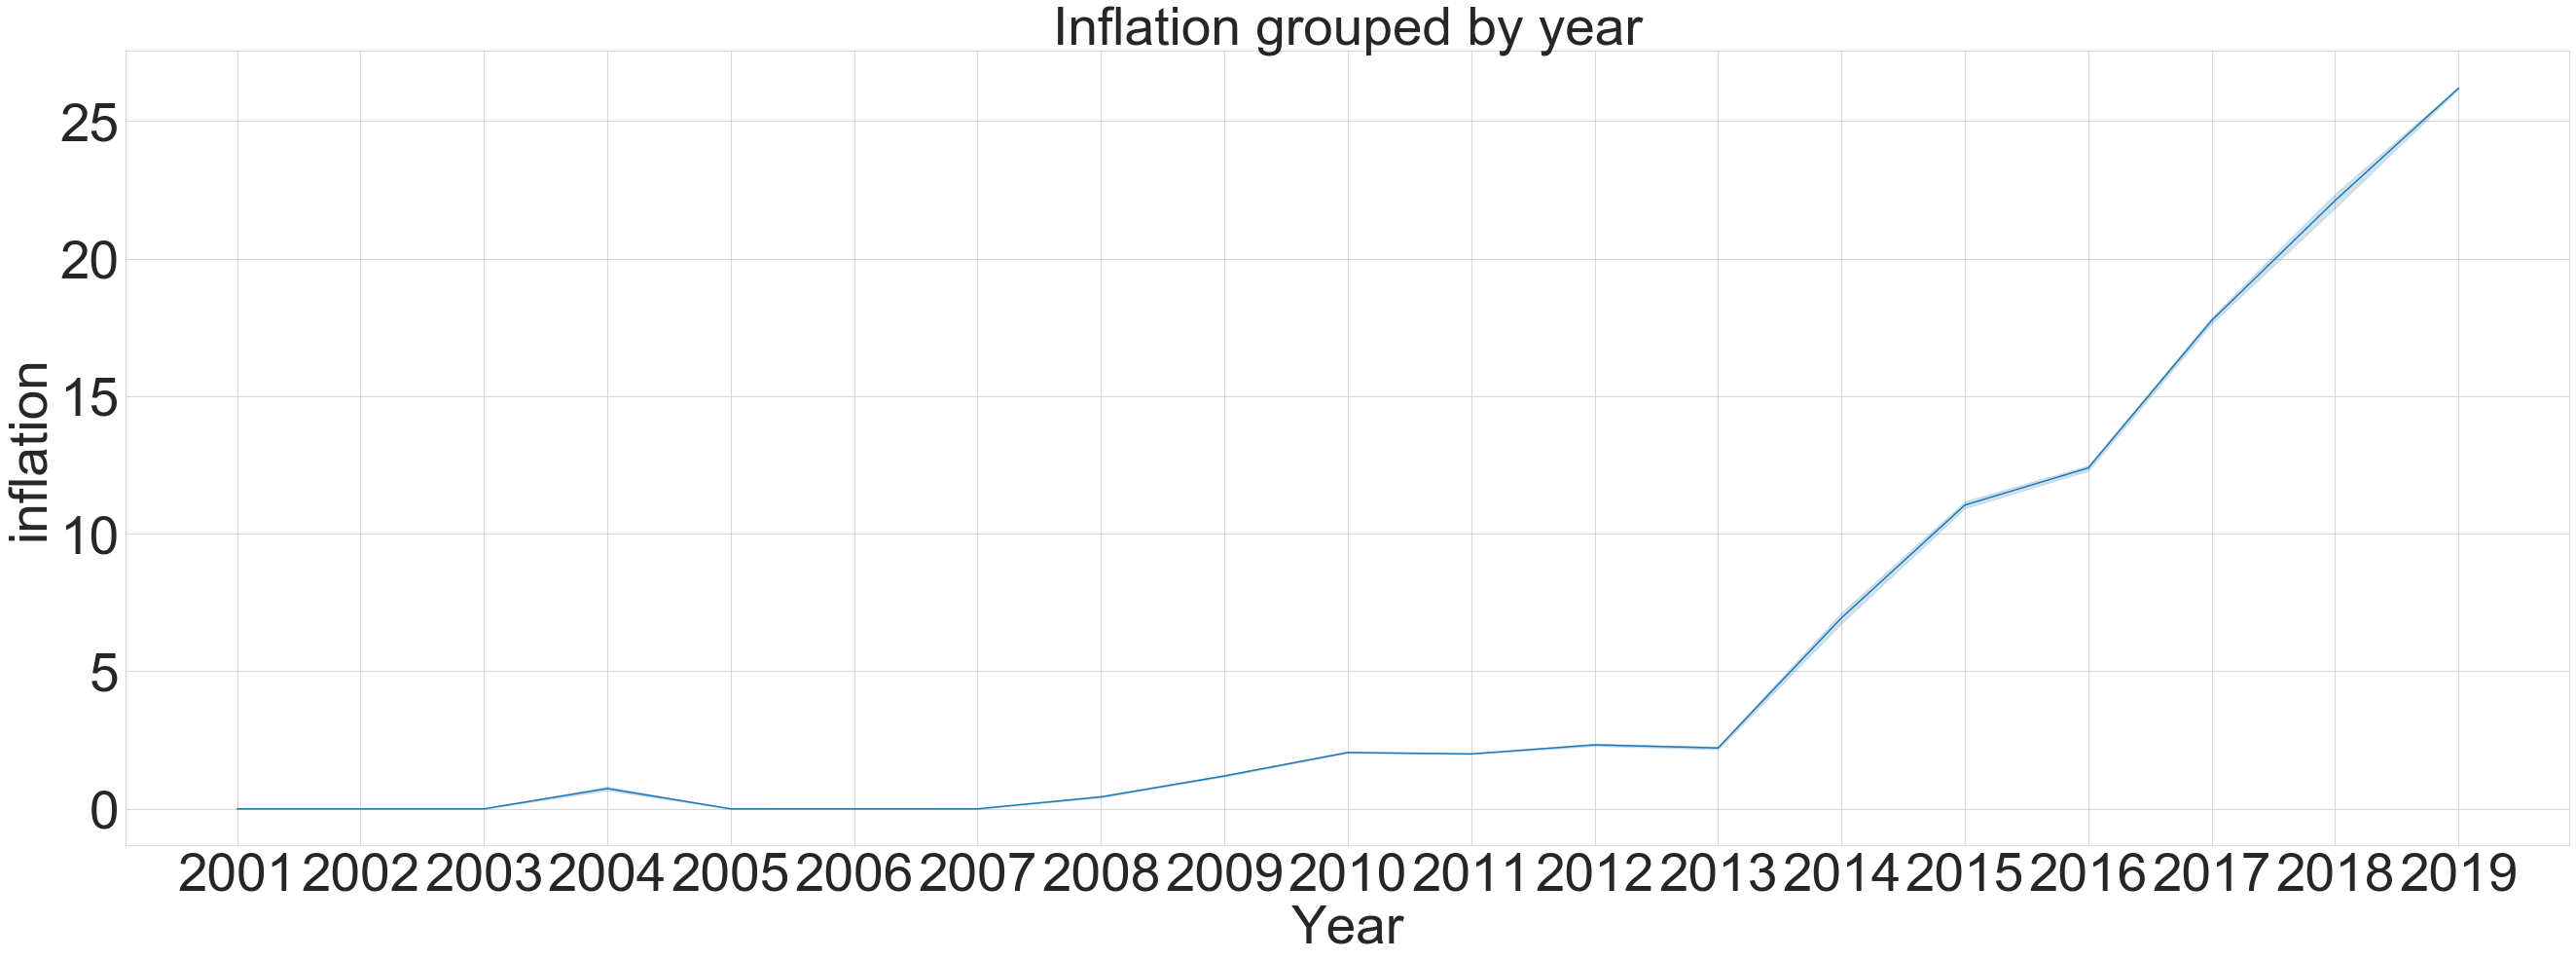

In [18]:
plotter.plotScales(dataframe = df_en, title = "Inflation grouped by year",yl="inflation", grouped="year", variable = "inflation")

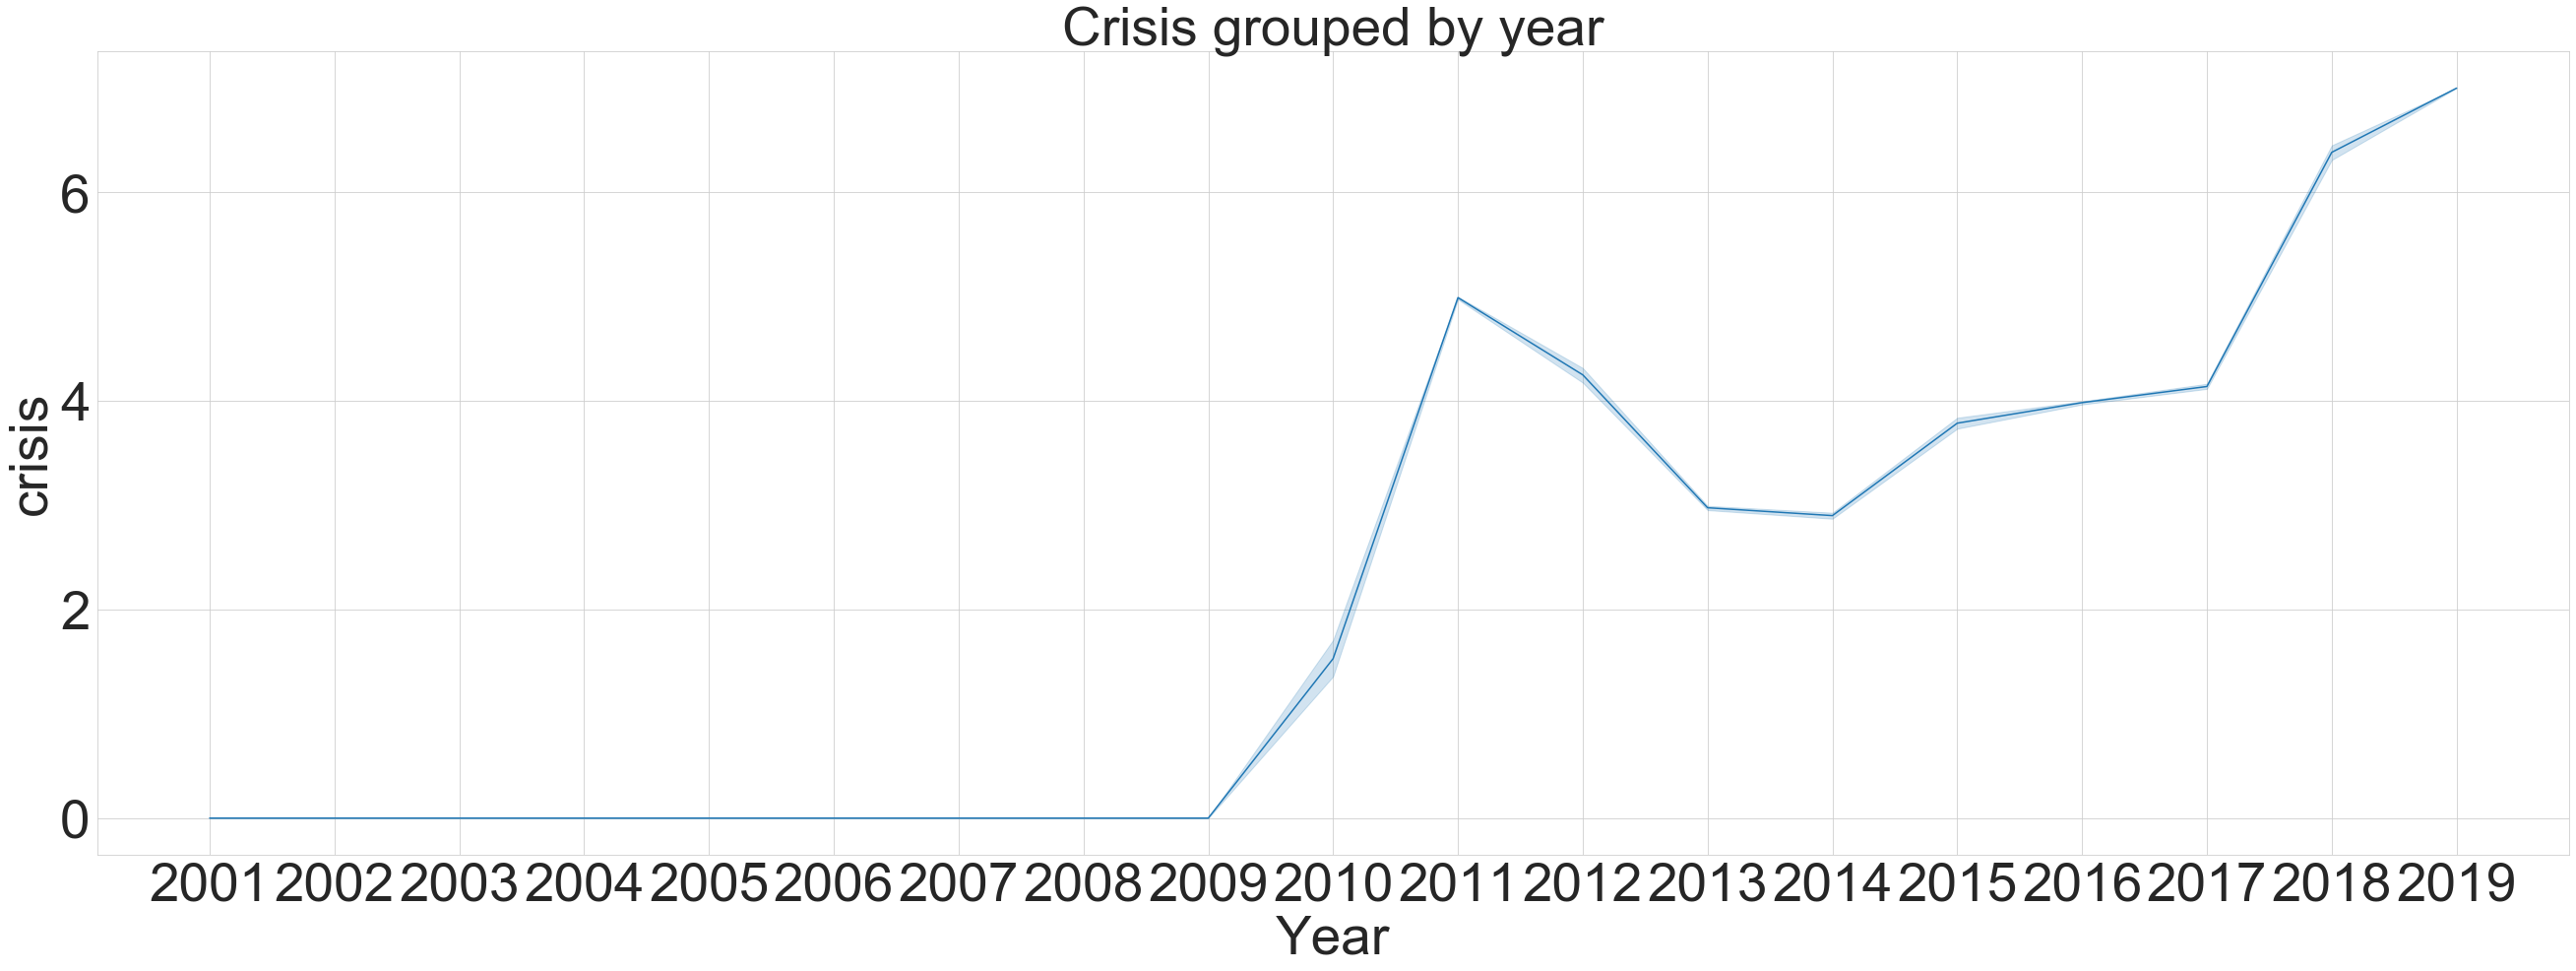

In [19]:
plotter.plotScales(dataframe = df_en, title = "Crisis grouped by year",yl="crisis", grouped="year", variable = "crisis")